<hr>

Capstone Project 2: Data Analysis == Supermarket Customer <br>

Andhika Prakoso - JCDSOL - B


<hr>

# **A.BACKGROUND STORY/CONTEXT**

Supermarket X ingin melakukan efisiensi penjualan agar dapat meningkatkan revenue toko di tahun depan. Supermarket ini memiliki data konsumen beserta pembeliannya dalam 2 tahun terakhir. Untuk dapat mencapai tersebut, Supermarket ini ingin menganalisa perilaku pembelian konsumennya. <br> <br>
Kamu diminta untuk menganalisa data pelanggan tersebut dan diharapkan memberikan saran strategis ke depan bagi Supermarket X.

<hr>

# **B. PROBLEM DEFINITION AND QUESTION TO ANSWER**

**Pertanyaan bisnis utama: Bagaimana meningkatkan pemasukan Supermarket berdasarkan pola perilaku pembelian konsumen dalam 2 tahun terakhir?** <br> <br>

**Pertanyaan riset yang perlu dijawab dari data:** 
1. Siapa dan bagaimana profil konsumen Supermarket X?<br>
1.2. Apa segmen pelanggan yang potensial dan perlu untuk ditarget lebih jauh?  <br>

2. Bagaimana menarget pelanggan potensial Supermarket X? <br>
2.1 Produk apa yang perlu ditawarkan untuk segmen pelanggan potensial? <br>
2.2 Channel mana yang efektif untuk segmen pelanggan potensial? <br>
2.3 Strategi marketing seperti apa yang efektif untuk segmen pelanggan potensial?<br>

<hr>

# **C. DATA UNDERSTANDING AND INITIAL CHECKING**


## **C.1. Data source**

Dalam melakukan analisa, data yang digunakan adalah data pelanggan Supermarket dalam 2 tahun terakhir. Data dapat diakses di [sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK). <br> <br>
Pada data pelanggan Supermarket yang digunakan terdapat beberapa datapoint seperti profil demografi, histori pembelian barang, histori tempat pembelian barang, dan histori aktivitas marketing/campaign. Secara lengkap, berikut adalah deskripsi seluruh kolom data yang terdapat dalam database: <br> <br>


| Kolom               | Deskripsi                                             |
|---------------------|-------------------------------------------------------|
| ID                  | Nomor ID unik pelanggan                           |
| Year_Birth          | Tahun kelahiran pelanggan                             |
| Education           | Tingkat pendidikan pelanggan                          |
| Marital_Status      | Status pernikahan pelanggan                           |
| Income              | Pendapatan tahunan rumah tangga pelanggan            |
| Kidhome             | Jumlah anak di rumah tangga pelanggan                |
| Teenhome            | Jumlah remaja di rumah tangga pelanggan              |
| Dt_Customer         | Tanggal pendaftaran pelanggan dengan perusahaan       |
| Recency             | Jumlah hari sejak pembelian terakhir pelanggan       |
| Complain            | Status aktivitas komplain pelanggan dalam 2 tahun terakhir (Y/N) |
| MntWines            | Jumlah pembelian anggur pelanggan dalam 2 tahun terakhir |
| MntFruits           | Jumlah pembelian buah pelanggan dalam 2 tahun terakhir |
| MntMeatProducts     | Jumlah pembelian daging pelanggan dalam 2 tahun terakhir |
| MntFishProducts     | Jumlah pembelian ikan pelanggan dalam 2 tahun terakhir |
| MntSweetProducts    | Jumlah pembelian permen pelanggan dalam 2 tahun terakhir |
| MntGoldProds        | Jumlah pembelian emas pelanggan dalam 2 tahun terakhir |
| NumDealsPurchases   | Jumlah pembelian dengan diskon                       |
| AcceptedCmp1        | 1 jika pelanggan menerima tawaran dalam kampanye pertama, 0 sebaliknya |
| AcceptedCmp2        | 1 jika pelanggan menerima tawaran dalam kampanye kedua, 0 sebaliknya |
| AcceptedCmp3        | 1 jika pelanggan menerima tawaran dalam kampanye ketiga, 0 sebaliknya |
| AcceptedCmp4        | 1 jika pelanggan menerima tawaran dalam kampanye keempat, 0 sebaliknya |
| AcceptedCmp5        | 1 jika pelanggan menerima tawaran dalam kampanye kelima, 0 sebaliknya |
| Response            | 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 sebaliknya |
| NumWebPurchases     | Jumlah pembelian melalui situs web perusahaan        |
| NumCatalogPurchases | Jumlah pembelian menggunakan katalog                 |
| NumStorePurchases   | Jumlah pembelian langsung di toko                   |
| NumWebVisitsMonth   | Jumlah kunjungan ke website perusahaan dalam bulan terakhir |


## **C.2. DATASET AND LIBRARY IMPORT**

Import library yang akan digunakan dalam proses analisa data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scikit_posthocs as sp
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal, shapiro
from scikit_posthocs import posthoc_dunn

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Import dataset yang akan dianalisa ke dalam variable ``Raw_Data``.

In [3]:
Raw_Data =pd.read_csv('Supermarket Customers.csv', delimiter = '\t')

Copy dataset ke dalam variable baru ``df``, agar kondisi ``Raw_Data`` tidak terdampak atas aktivitas analisa data

In [4]:
df = Raw_Data.copy()
display(df.head(10), df.tail(10))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


## **C.3. DATA CHECK AND UNDERSTANDING** <br> 

### **Pengecekan data deskriptif**

In [5]:
print(f'Jumlah baris dan kolom dari dataset Supermarket Customer adalah {df.shape}') 
df.info()

Jumlah baris dan kolom dari dataset Supermarket Customer adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [8]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Nama Kolom','Jumlah Unique Value','Unique Values'],data=list_item)
tabel_desc

,Nama Kolom,Jumlah Unique Value,Unique Values
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510,

In [9]:
unique_yearBirth = df['Year_Birth'].unique()
unique_yearBirth.sort()
print(unique_yearBirth)

[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]


In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

unique_dt_customer = df['Dt_Customer'].dt.strftime('%y-%m-%d').unique()
unique_dt_customer.sort()
unique_dt_customer = pd.DataFrame(unique_dt_customer, columns= ['date'])
display(unique_dt_customer.min(), unique_dt_customer.max())

date    12-07-30
dtype: object

date    14-06-29
dtype: object

### **Pengecekan data missing**

In [11]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### **Pengecekan data duplikat**

In [12]:
duplicated_data = df.duplicated(subset='ID')
print(df[duplicated_data])

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []


### **Pengecekan distribusi data & normalitas**

Pengecekan terhadap data dengan datatype int atau float agar mengetahui situasi persebaran data:
- Bagaimana distribusi data?
- Apakah data terdistribusi normal?

*Notes: 
Data yang dicek adalah ``['Year_Birth', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth']``*

In [13]:
Columns_to_Check_Boxplot = ['Year_Birth', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth']

In [14]:
# Uji normalitas
for column_name in Columns_to_Check_Boxplot:
    # Shapiro-Wilk test
    data = df[column_name].dropna()  # Handle missing values
    statistic, p_value = shapiro(data)

    print(f"Shapiro-Wilk Test for {column_name}:\n"
          f"Statistic: {statistic}\n"
          f"P-value: {p_value}")

    # Check p-value result
    alpha = 0.05
    if p_value > alpha:
        print(f"The data in {column_name} appears to be normally distributed (fail to reject the null hypothesis).\n")
    else:
        print(f"The data in {column_name} does not appear to be normally distributed (reject the null hypothesis).\n")


Shapiro-Wilk Test for Year_Birth:
Statistic: 0.9757195115089417
P-value: 4.535353233457941e-19
The data in Year_Birth does not appear to be normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for Income:
Statistic: 0.7770531177520752
P-value: 0.0
The data in Income does not appear to be normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for Recency:
Statistic: 0.9540770053863525
P-value: 5.698252316095217e-26
The data in Recency does not appear to be normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for MntWines:
Statistic: 0.8381436467170715
P-value: 5.7032847498020055e-43
The data in MntWines does not appear to be normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for MntFruits:
Statistic: 0.6890809535980225
P-value: 0.0
The data in MntFruits does not appear to be normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for MntMeatProducts:
Statistic: 0.7298182249069214
P-value: 0.0
The data in M

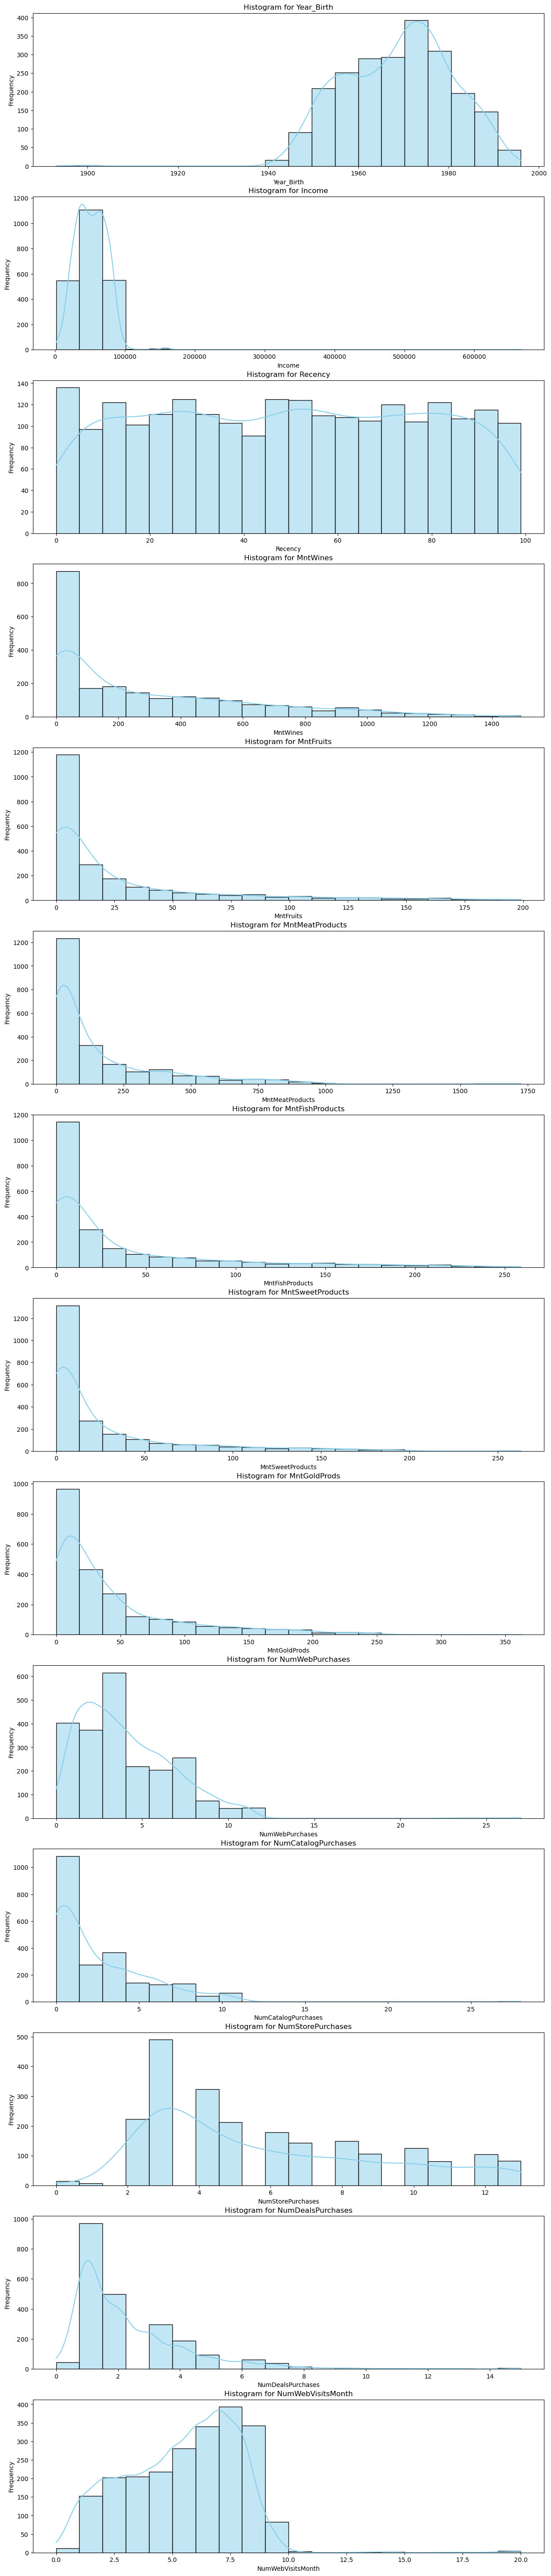

In [15]:
# Subplots distribution
fig, axes = plt.subplots(nrows=len(Columns_to_Check_Boxplot), ncols=1, figsize=(15, 75))

# For Loop to create histogram
for i, column in enumerate(Columns_to_Check_Boxplot):
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout
plt.show()

### **Rangkuman temuan awal**

Melalui pengecekan awal deskriptif dataset Supermarket Customer, terdapat beberapa hal yang ditemukan. Beberapa temuan ini akan perlu tindakan lebih lanjut, dan akan dilakukan saat pada data preparation and cleaning <br> <br>
Temuan tersebut yaitu:
1. Tidak terdapat data duplikat dalam database Supermarket Customer berdasarkan kolom ``ID``.
2. Sejumlah kolom memiliki datatype yang kurang tepat. Datatypes untuk kolom ``Dt_Customer`` kurang tepat. seharusnya dalam format ``datetime``
3. Ada dua kolom yang tidak sesuai informasi kolom dataset yaitu ``Z_CostContact`` dan	``Z_Revenue``. Setelah pengecekan lebih lanjut, kedua kolom ini hanya berisi satu value yang sama untuk seluruh rows.
4. Terdapat missing data pada kolom ``income`` sebanyak 24 rows
5. Ada value  error pada kolom ``marital status`` yaitu berisi ``YOLO`` dan `Absurd`.
6. Ada value error/aneh/tidak logis pada kolom `Birth_date` yaitu berisi tahun lahir di bawah `< 1940`
7. Urutan kolom `AcceptedCmp1` `AcceptedCmp2` berada di urutan yang tidak sesuai
8. Data demografi tidak terdistribusi normal dan terindikasi memiliki beberapa outliers
9. Data pembelian barang dan lokasi pembelian terindikasi terdistribusi skewed positif. Informasi ini akan berguna pada saat data analisis dengan menggunakan teknik analisa yang sesuai dengan kondisi data

<hr>

# **D. DATA PREPARATION AND CLEANING (MISSING, OUTLIERS, ERROR, DUPLICATED, ETC)**



## **D.1 Data error handling**

### **Menghapus columns yang tidak relevan: ``Z_CostContact`` & ``Z_Revenue``**

Mengapus columns dengan metode ``drop``:

In [16]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis= 1, inplace = True)

### **Menghapus data error label ``YOLO`` dan ``Absurd`` dan mengganti label ``alone`` pada column ``Marital_Status``**

Pengecekan proposi data dengan label Yolo, Absurd, dan Alone:

In [17]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

**Data error dengan label ``Absurd`` dan ``YOLO`` akan dihapus/remove** dengan pertimbangan bahwa proporsi-nya yang kecil dibandingkan keseluruhan proporsi dataset sehingga tidak akan mempengaruhi distribusi keseluruhan data 

In [18]:
for index, row in df.iterrows():
    if row['Marital_Status'] in ['YOLO', 'Absurd']:
        df.drop(index, inplace=True)

Label data ``Alone`` akan diubah menjadi ``Single``

In [19]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

Pengecekan kembali column ``Marital_Status`` setelah dilakukan pengubahan

In [20]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: count, dtype: int64

## **D.2 Data missing handling**

### **Menangani value kosong pada colums `Income`**

Pengecekan proporsi missing value terhadap total seluruh data:

In [21]:
df.isna().sum()/df.count()*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.084991
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

List data yang terdeteksi memiliki value `income` null

In [22]:
missing_values_mask = df['Income'].isnull()

df_missing_values = df[missing_values_mask]
df_missing_values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


Pengecekan distribusi sampel dataset:

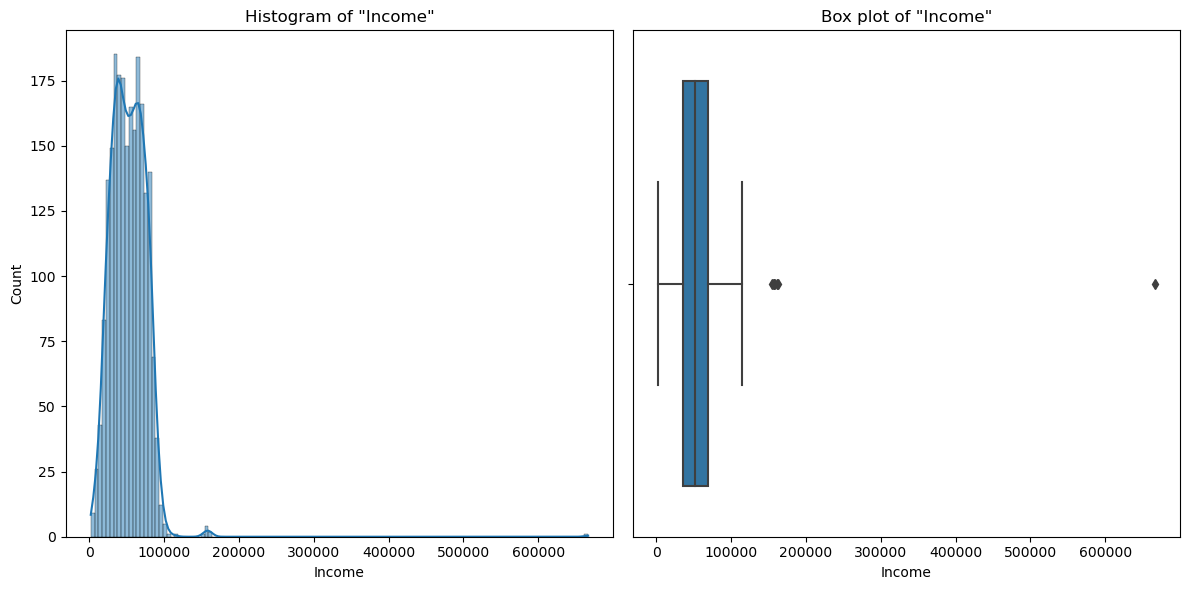

In [23]:
# Create panel
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create Hisplot graph
sns.histplot(x=df['Income'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of "Income"')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Count')

# Create Boxplot
sns.boxplot(x=df['Income'], ax=axes[1])
axes[1].set_title('Box plot of "Income"')
axes[1].set_xlabel('Income')

# Layout format
plt.tight_layout()

plt.show()



In [25]:
# Pengujian normalitas test terhadap column Income

Test_Income = pd.DataFrame(df['Income'].dropna())

statistic, p_value = shapiro(Test_Income['Income'])

print(f'Statistic: {statistic}, p-value: {p_value}')
if p_value > 0.05:
    print(' H0 is accepted: The Income data appears to be normally distributed.')
else:
    print('H0 is rejected: The Income data does not appear to be normally distributed.')

Statistic: 0.7768814563751221, p-value: 0.0
H0 is rejected: The Income data does not appear to be normally distributed.


Temuan: <br>
- Proporsi missing value hanya 1.1% dari keseluruhan dataset.  
- Persebaran dataset income terdistribusi tidak secara normal

Dengan pertimbangan dua temuan ini, tindakan yang akan diambil untuk **mengisi menggunakan median**. Menggunakan median lebih cocok untuk mengisi missing value pada column yang tidak terdistribusi normal

Mengisi missing value dengan nilai rata-rata:

In [26]:
median_income = df['Income'].median()
print(median_income)

51381.5


In [27]:
df['Income'].fillna(median_income, inplace= True)

In [28]:
df['Income'].iloc[['10', '43', '48']]

10    51381.5
43    51381.5
48    51381.5
Name: Income, dtype: float64

Missing value column `income` telah ditangani dengan mengisi value yang kosong dengan nilai median (nilai tengah)

## **D.3 Data outliers handling**

### Data ``Year_Birth``

Berdasarkan temuan awal, diduga terdapat data outliers dalam dataset column `Year_Birth`. Oleh karena itu, di sini akan coba dibuktikan dugaan tersebut

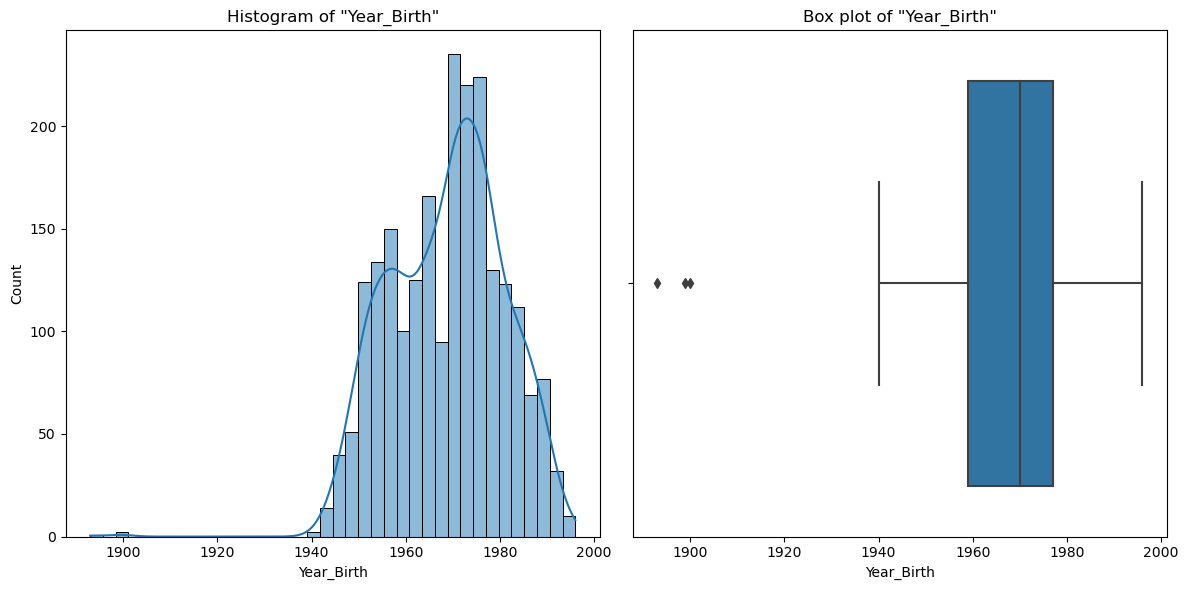

In [29]:
# Pembuatan panel graph
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Hisplot graph
sns.histplot(x=df['Year_Birth'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of "Year_Birth"')
axes[0].set_xlabel('Year_Birth')
axes[0].set_ylabel('Count')

# Boxplot graph
sns.boxplot(x=df['Year_Birth'], ax=axes[1])
axes[1].set_title('Box plot of "Year_Birth"')
axes[1].set_xlabel('Year_Birth')

# Layout format
plt.tight_layout()

plt.show()

Terdapat sejumlah data outliers (pencilan) di luar dari kumpulan distribusi mayoritas dataset `Birth_Year`, yaitu data lahir di bawah tahun 1910. Selain itu, secara logis data usia ini kurang masuk akal karena apabila artinya setidaknya pelanggan ini sudah berusia lebih dari 110 tahun. 

Tindakan yang akan diambil adalah data ini akan diremove dari dataset, mengingat jumlah-nya yang sedikit sehingga kecil kemungkinan berpengaruh signifikan saat proses analisa data

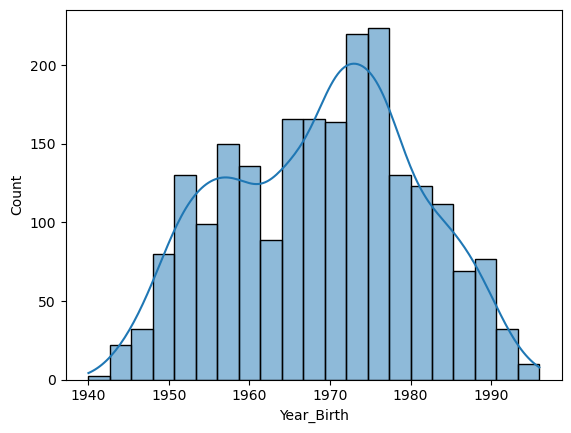

In [30]:
Birth_Year_Outliers = df['Year_Birth'] < 1910
df = df[~Birth_Year_Outliers]

sns.histplot(x=df['Year_Birth'], kde=True)
axes[0].set_title('Histogram of "Year_Birth"')
axes[0].set_xlabel('Year_Birth')
axes[0].set_ylabel('Count')

plt.show()


### Data `Income`

Berdasarkan temuan sebelumnya, diketahui terdapat sejumlah data yang terdistribusi di luar mayoritas persebaran data `income`. Pengecekan proporsi data outliers tersebut:

In [31]:
top_10_incomes = df['Income'].nlargest(10)
print(top_10_incomes)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
Name: Income, dtype: float64


In [32]:
Income_Outliers = df[df['Income'] > 150000].count() #150000 dipakai sebagai estimasi dari graph histogram
Income_Outliers

ID                     8
Year_Birth             8
Education              8
Marital_Status         8
Income                 8
Kidhome                8
Teenhome               8
Dt_Customer            8
Recency                8
MntWines               8
MntFruits              8
MntMeatProducts        8
MntFishProducts        8
MntSweetProducts       8
MntGoldProds           8
NumDealsPurchases      8
NumWebPurchases        8
NumCatalogPurchases    8
NumStorePurchases      8
NumWebVisitsMonth      8
AcceptedCmp3           8
AcceptedCmp4           8
AcceptedCmp5           8
AcceptedCmp1           8
AcceptedCmp2           8
Complain               8
Response               8
dtype: int64

Setelah ditemukan proporsi data outliers-nya dan diketahui bahwa jumlahnya sangat kecil, maka data outliers tersebut akan diremove. Setelahnya akan dibuktikan hasil penghapusan data melalui grafik histogram terbaru.

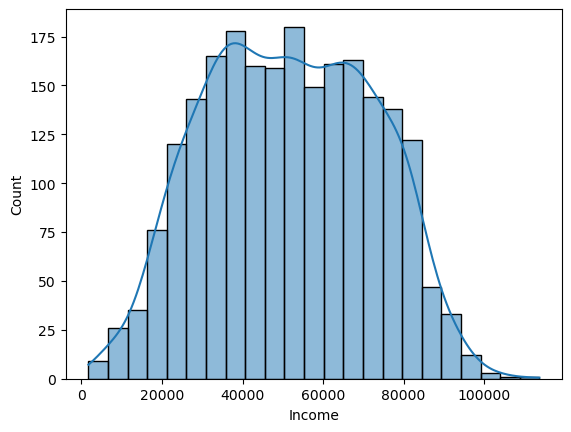

In [33]:
Income_Outliers = df['Income'] > 150000
df = df[~Income_Outliers]

sns.histplot(x=df['Income'], kde=True)
axes[0].set_title('Histogram of "Income"')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Count')

plt.show()

## **D.4 Data reformat handling**

### Mengubah datatype

Mengubah datatype untuk columns `Dt_Customer` menjadi Datetime

In [34]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Mengubah nama column `Response` menjadi `AcceptedCmp6`

In [35]:
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace= True)

### Menambah column baru

Menambah column `status_parent` berdasarkan jumlah anak yang dimiliki (teenager and kid)

In [36]:
df['Parent_Status'] = np.where(df['Kidhome'] + df['Teenhome']>0, 'Parent', 'Non-Parent')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Parent_Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Non-Parent
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Parent
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Non-Parent
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Parent
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Parent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,Parent
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,Parent
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,Non-Parent
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,Parent


Menambah column `Frequency` berdasarkan jumlah pembelian di setiap channel penjualan Supermarket X (Store, Website, Catalog)

In [37]:
df['Frequency'] = df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Parent_Status,Frequency
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Non-Parent,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Parent,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Non-Parent,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Parent,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Parent,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,Parent,16
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,Parent,15
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,Non-Parent,18
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,Parent,21


Menambah column `Monetary` berdasarkan jumlah uang yang dibelanjakan di setiap item yang tersedia di Supermarket X selama dua tahun terakhir

In [38]:
df['Monetary'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Parent_Status,Frequency,Monetary
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Non-Parent,22,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Parent,4,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Non-Parent,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Parent,6,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Parent,14,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,Parent,16,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,Parent,15,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,Non-Parent,18,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,Parent,21,843


### Mengubah urutan column

Mengubah urutan columns

In [39]:
df = df[['ID', 'Year_Birth','Education','Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Parent_Status', 'Dt_Customer', 'Complain', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumWebPurchases', 'NumCatalogPurchases',	'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases','AcceptedCmp1', 'AcceptedCmp2',	'AcceptedCmp3', 'AcceptedCmp4',	'AcceptedCmp5', 'AcceptedCmp6', 'Recency', 'Frequency', 'Monetary']]

## **D5. Hasil akhir setelah data preparation**

In [40]:
print(f'Jumlah baris dan kolom dari dataset Supermarket Customer adalah {df.shape}') 
df.info()

Jumlah baris dan kolom dari dataset Supermarket Customer adalah (2225, 30)
<class 'pandas.core.frame.DataFrame'>
Index: 2225 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2225 non-null   int64         
 1   Year_Birth           2225 non-null   int64         
 2   Education            2225 non-null   object        
 3   Marital_Status       2225 non-null   object        
 4   Income               2225 non-null   float64       
 5   Kidhome              2225 non-null   int64         
 6   Teenhome             2225 non-null   int64         
 7   Parent_Status        2225 non-null   object        
 8   Dt_Customer          2225 non-null   datetime64[ns]
 9   Complain             2225 non-null   int64         
 10  MntWines             2225 non-null   int64         
 11  MntFruits            2225 non-null   int64         
 12  MntMeatProducts     

In [41]:
display(df.head (5), df.tail(5))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Parent_Status,Dt_Customer,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Recency,Frequency,Monetary
0,5524,1957,Graduation,Single,58138.0,0,0,Non-Parent,2012-09-04,0,635,88,546,172,88,88,8,10,4,7,3,0,0,0,0,0,1,58,22,1617
1,2174,1954,Graduation,Single,46344.0,1,1,Parent,2014-03-08,0,11,1,6,2,1,6,1,1,2,5,2,0,0,0,0,0,0,38,4,27
2,4141,1965,Graduation,Together,71613.0,0,0,Non-Parent,2013-08-21,0,426,49,127,111,21,42,8,2,10,4,1,0,0,0,0,0,0,26,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,Parent,2014-02-10,0,11,4,20,10,3,5,2,0,4,6,2,0,0,0,0,0,0,26,6,53
4,5324,1981,PhD,Married,58293.0,1,0,Parent,2014-01-19,0,173,43,118,46,27,15,5,3,6,5,5,0,0,0,0,0,0,94,14,422


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Parent_Status,Dt_Customer,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Recency,Frequency,Monetary
2235,10870,1967,Graduation,Married,61223.0,0,1,Parent,2013-06-13,0,709,43,182,42,118,247,9,3,4,5,2,0,0,0,0,0,0,46,16,1341
2236,4001,1946,PhD,Together,64014.0,2,1,Parent,2014-06-10,0,406,0,30,0,0,8,8,2,5,7,7,1,0,0,0,0,0,56,15,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,Non-Parent,2014-01-25,0,908,48,217,32,12,24,2,3,13,6,1,0,0,0,1,0,0,91,18,1241
2238,8235,1956,Master,Together,69245.0,0,1,Parent,2014-01-24,0,428,30,214,80,30,61,6,5,10,3,2,0,0,0,0,0,0,8,21,843
2239,9405,1954,PhD,Married,52869.0,1,1,Parent,2012-10-15,0,84,3,61,2,1,21,3,1,4,7,3,0,0,0,0,0,1,40,8,172


# **E. DATA ANALYSIS AND VISUALIZATION**

## **E.1. Siapa pelanggan Supermarket X? Bagaimana profil yang potensial untuk Supermarket X?**

### Analisa Customer Segmentation pelanggan Supermarket X:

Dalam melakukan analisa bagian ini, pertama-tama kita akan melakukan proses segmentasi customer pelanggan Supermarket X. Segmentasi customer bermanfaat untuk mencari tahu ada berapa segmen pelanggan Supermarket X, dan segmen mana yang lebih potensial untuk ditarget ke depan. <br>

Kerangka segmentasi customer akan menggunakan model RFM (Recency, Frequency, Monetary). Model ini dipercaya mampu dengan baik mengindentifikasi customer menjadi sejumlah segmen/kelompok dari sudut pandang konsumsi sehingga lebih akurat ketika menentukan potensi segmen yang akan ditarget.

Dalam melakukan segmentasi customer, kita akan melakukan `Clustering analysis` dengan teknik K-means pada features RFM (Recency, Frequency, Monetary)

In [42]:
# Import library yang dibutuhkan
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
# Membuat variable baru berisi dataframe feature RFM (Recency, Frequency, Monetary)
RFM_Data = df[['Recency', 'Frequency', 'Monetary']]

In [44]:
# Scaling dataframe RFM sehingga dataframe akan dalam bentuk skala yang standar
scaler = StandardScaler()
RFM_Scaled = scaler.fit_transform(RFM_Data)

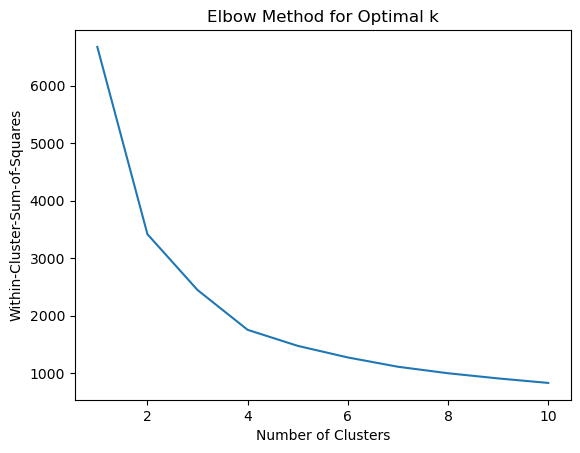

In [45]:
# Menghitung analisa Elbow Method sebagai langkah untuk menentukan nilai K-Optimal (jumlah kelompok segmentasi) pada saat melakukan analisa K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(RFM_Scaled)
    wcss.append(kmeans.inertia_)

# Graph plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

Dari grafik hasil pengukuran Elbow Method, **nilai K-Optimal untuk segmentasi customer Supermarket X adalah 4**. Nilai ini berdasarkan titik nilai saat pergerakan trendline grafik sudah stabil/landai. <br> 

Selanjutnya adalah analisa K-means untuk mendapatkan pengelompokan segmen customer:

C:\Users\User\AppData\Local\Temp\ipykernel_16228\1134991785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_1'] = kmeans.fit_predict(RFM_Scaled)


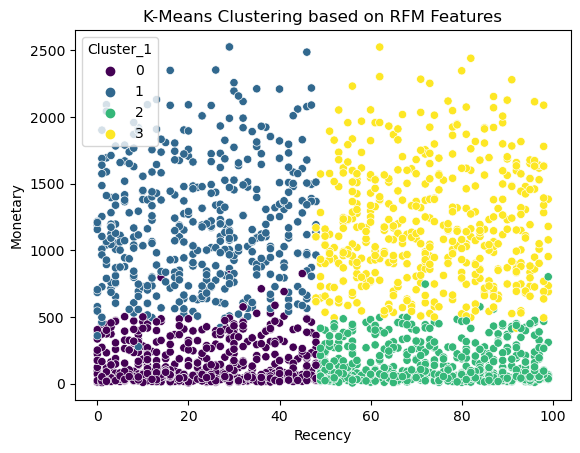

In [46]:
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster_1'] = kmeans.fit_predict(RFM_Scaled)

sns.scatterplot(x='Recency', y='Monetary', hue='Cluster_1', data=df, palette='viridis')
plt.title('K-Means Clustering based on RFM Features')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

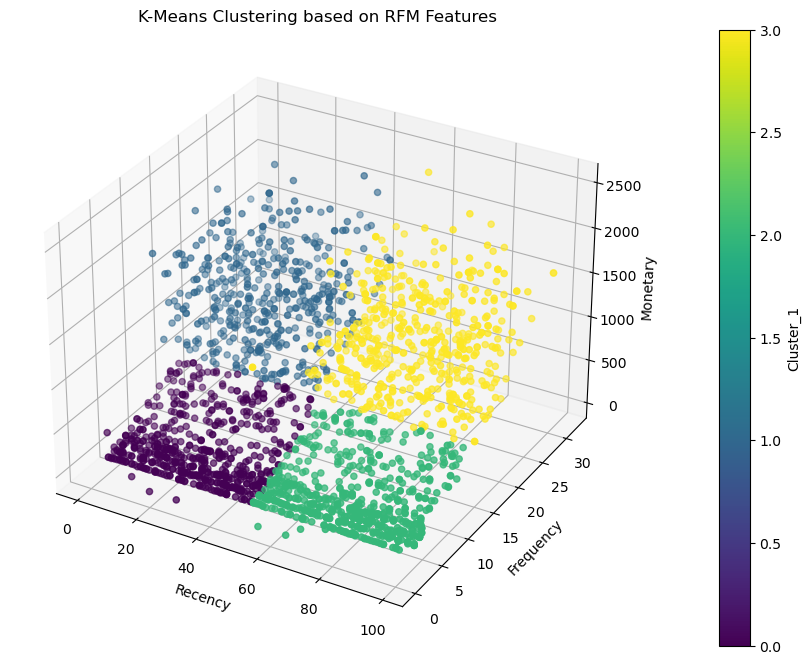

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Graph scatter plot 3d features RFM 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster_1'], cmap='viridis')

ax.set_title('K-Means Clustering based on RFM Features')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

colorbar = fig.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster_1')

plt.show()


In [48]:
import plotly.express as px

fig = px.scatter_3d(df, x='Recency', y='Frequency', z='Monetary', color='Cluster_1', opacity=0.7, size_max=10, symbol='Cluster_1')

fig.update_layout(title='K-Means Clustering based on RFM Features',
                  scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary'))

fig.show()


Setelah mengidentifikasi segmentasi customer pelanggan Supermarket X, selanjutnya kita akan cek propori masing-masing segmen yang teridentifikasi

In [49]:
# Mengganti label segmen untuk mempermudah menandai kelompok pelanggan yang teridentifikasi
Label_Segmen = {0: 'Segmen#1', 1: 'Segmen#2', 2: 'Segmen#3', 3: 'Segmen#4'}
df['Cluster_1'] = df['Cluster_1'].map(Label_Segmen)

C:\Users\User\AppData\Local\Temp\ipykernel_16228\251964050.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
# Tabel jumlah ID dan % ID berdasarkan cluster segmen
Distribusi_ID_ByCluster = pd.DataFrame(df.groupby('Cluster_1')['ID'].count().reset_index())
Distribusi_ID_ByCluster.columns = ['Cluster_1', 'Count ID']
Distribusi_ID_ByCluster['% ID'] = (Distribusi_ID_ByCluster['Count ID'] / Distribusi_ID_ByCluster['Count ID'].sum()) * 100
Distribusi_ID_ByCluster.round(2)

,Cluster_1,Count ID,% ID
0,Segmen#1,613,27.55
1,Segmen#2,463,20.81
2,Segmen#3,628,28.22
3,Segmen#4,521,23.42


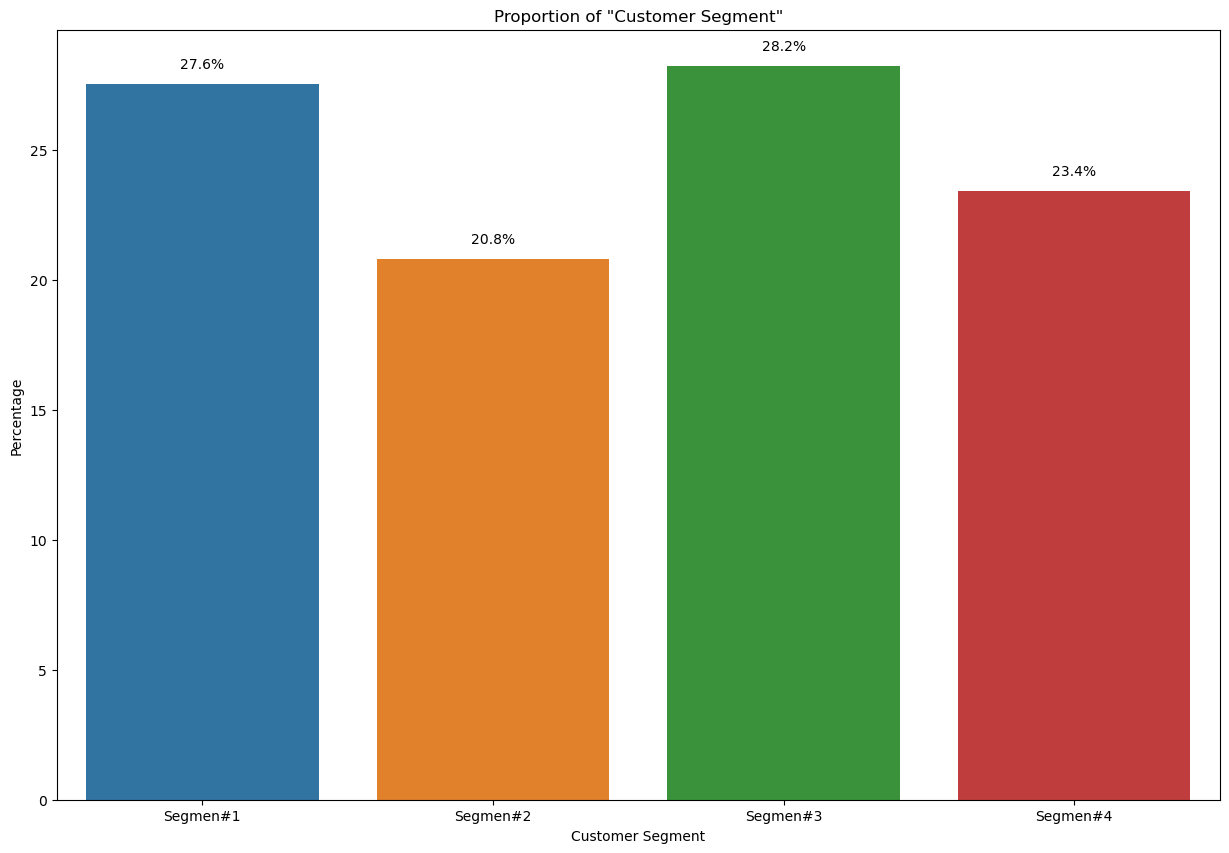

In [51]:
# Grafik barplot % ID masing-masing segmen pelanggan
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.barplot(x='Cluster_1', y='% ID', data=Distribusi_ID_ByCluster)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

plt.title('Proportion of "Customer Segment"')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')

plt.show()

**Hasil analisa**:
- Hasil clustering analysis menggunakan teknik K-means berhasil mengidentifikasi 4 segmen/kelompok pelanggan Supermarket X. Secara umum, tiap segmen memiliki karakteristik yang berbeda-beda berdasarkan feature RFM-nya. 

- Ke-empat segmen pelanggan Supermarket X memiliki jumlah proposi pelanggan yang cukup berimbang. Paling banyak pelanggan terkategorisasi sebagai segmen#3, sementara paling kecil di segmen #2.

- Hasil segmentasi clusetering analysis ini belum memberikan penjelasan mendalam mengenai karakteristik dan profil dari segmen customer yang teridentifikasi. Hal ini dibutuhkan agar kita lebih memahami dengan komprehensif dan menjawab siapa pelanggan Supermarket X. Kita akan melakukan analisa ini berikutnya. Namun, sebelum melakukan analisa deskripsi profil dan karakteristik segmen pelanggan, kita perlu menentukan terlebih dahulu segmen yang potensial untuk ditarget lebih dalam. Ini bermanfaat agar proses deskripsi yang dilakukan dapat lebih terstruktur dan terfokus pada kelompok yang potensial tersebut.

### Analisa kelompok pelanggan Supermarket X yang potensial dan prioritas untuk difokuskan lebih dalam:

**Berdasarkan karakteristik RFM model**:
- Secara umum, segmen potensial kelompok yang memiliki spending tinggi, sering berbelanja, dan masih rutin berbelanja di Supermarket X. Oleh karena itu, karakteristik ideal adalah kelompok dengan Monetary tinggi, Frequency tinggi, dan Recency rendah. Inilah kriteria segmen yang potensial dan ingin kita target.

In [52]:
RFM_Segment= df[['Recency', 'Frequency', 'Monetary', 'Cluster_1']]
RFM_Segment

,Recency,Frequency,Monetary,Cluster_1
0,58,22,1617,Segmen#4
1,38,4,27,Segmen#1
2,26,20,776,Segmen#2
3,26,6,53,Segmen#1
4,94,14,422,Segmen#3
...,...,...,...,...
2235,46,16,1341,Segmen#2
2236,56,15,444,Segmen#3
2237,91,18,1241,Segmen#4
2238,8,21,843,Segmen#2


In [53]:
# Tabel RFM dalam bentuk rata-rata (Avg) untuk tiap segmen
RFM_Segment_ByMeans = RFM_Segment.groupby(RFM_Segment['Cluster_1']).mean()
RFM_Segment_ByMeans = RFM_Segment_ByMeans.round(2)
RFM_Segment_ByMeans

,Recency,Frequency,Monetary
Cluster_1,,,
Segmen#1,23.55,7.06,151.06
Segmen#2,22.95,19.75,1180.76
Segmen#3,73.50,7.04,146.82
Segmen#4,73.17,19.23,1180.47


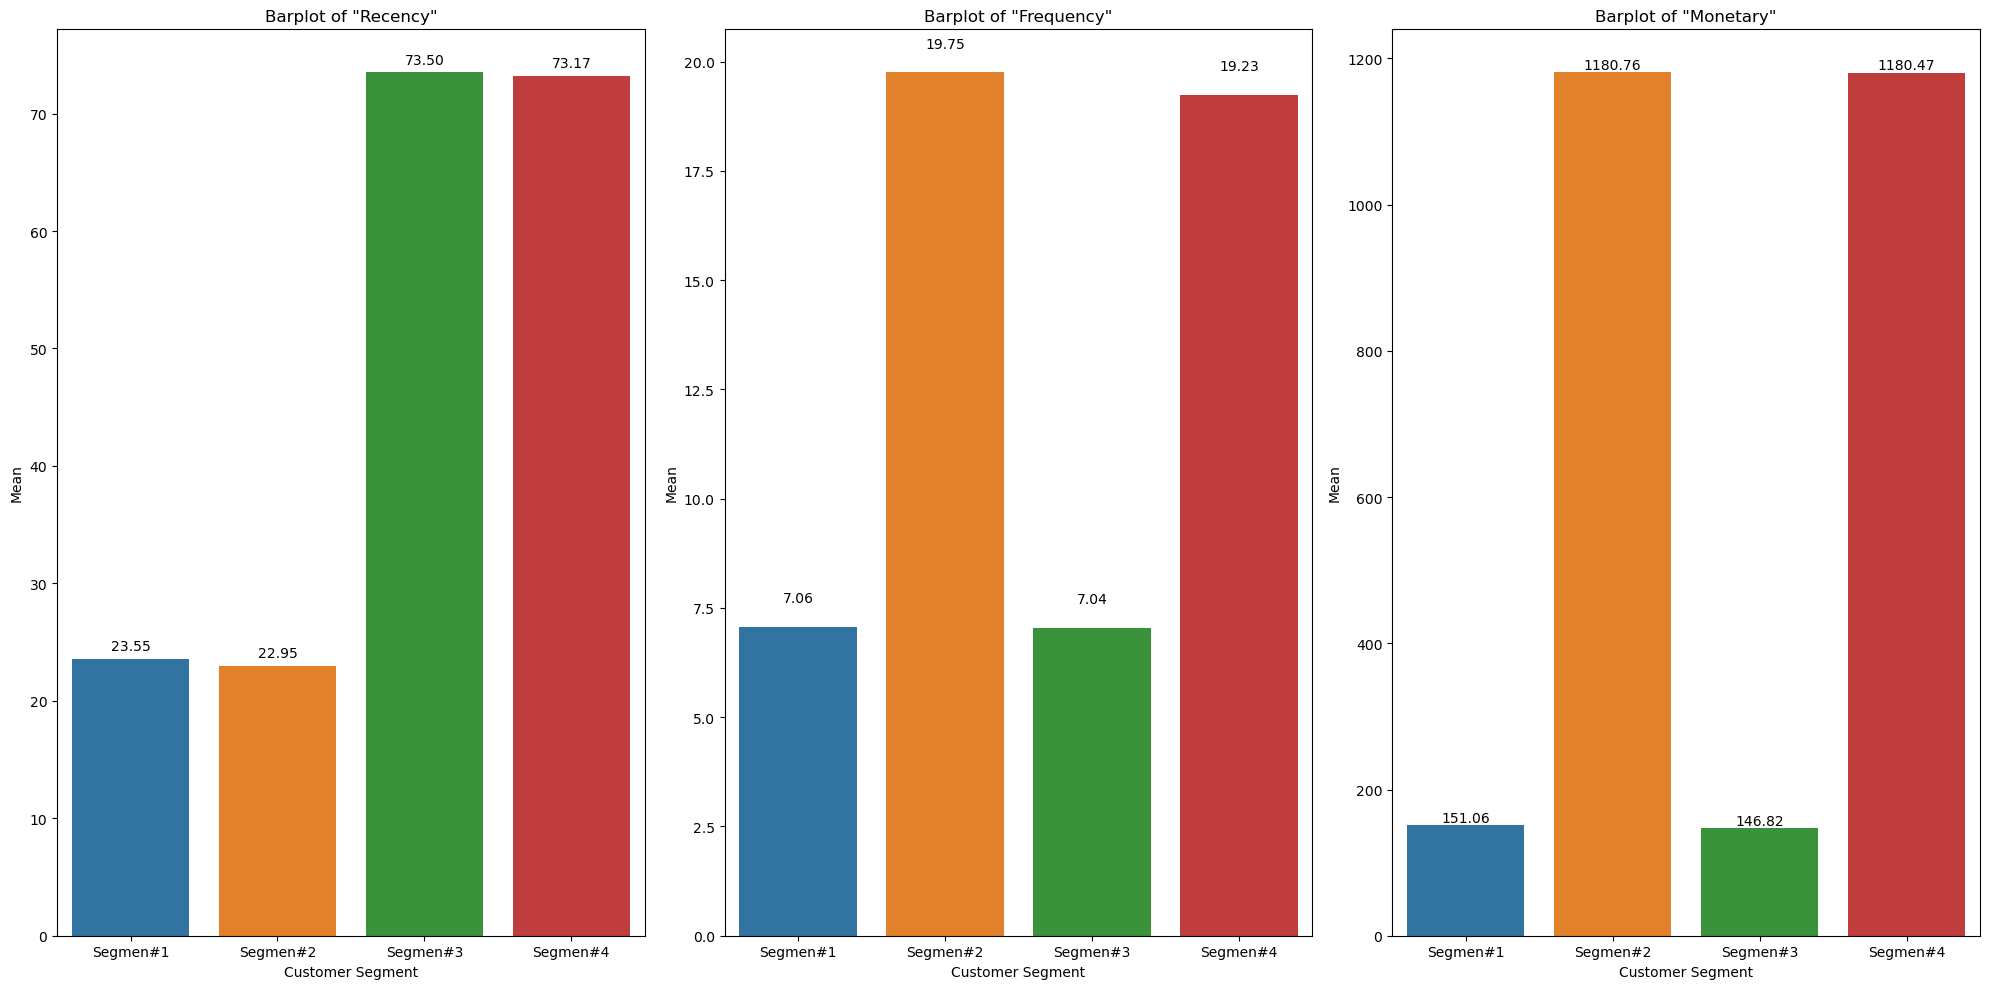

In [54]:
# Pembuatan panel graph
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

# Barplot Recency
ax_recency = sns.barplot(x=RFM_Segment_ByMeans.index, y='Recency', data=RFM_Segment_ByMeans, ax=axes[0])

for p in ax_recency.patches:
    height = p.get_height()
    ax_recency.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', va='bottom')

ax_recency.set_title('Barplot of "Recency"')
ax_recency.set_xlabel('Customer Segment')
ax_recency.set_ylabel('Mean')

# Barplot Frequency
ax_frequency = sns.barplot(x=RFM_Segment_ByMeans.index, y='Frequency', data=RFM_Segment_ByMeans, ax=axes[1])

for p in ax_frequency.patches:
    height = p.get_height()
    ax_frequency.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', va='bottom')

ax_frequency.set_title('Barplot of "Frequency"')
ax_frequency.set_xlabel('Customer Segment')
ax_frequency.set_ylabel('Mean')

# Barplot Monetary
ax_monetary = sns.barplot(x=RFM_Segment_ByMeans.index, y='Monetary', data=RFM_Segment_ByMeans, ax=axes[2])

for p in ax_monetary.patches:
    height = p.get_height()
    ax_monetary.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', va='bottom')

ax_monetary.set_title('Barplot of "Monetary"')
ax_monetary.set_xlabel('Customer Segment')
ax_monetary.set_ylabel('Mean')

# Layout format
plt.tight_layout()

plt.show()


In [55]:
variables_to_test = ['Recency', 'Frequency', 'Monetary']
cluster_column = 'Cluster_1'

# Perform Kruskal-Wallis test for each variable grouped by Cluster_1
for variable in variables_to_test:
    data_by_cluster = [RFM_Segment[variable][RFM_Segment[cluster_column] == cluster] for cluster in RFM_Segment[cluster_column].unique()]
    
    # Perform Kruskal-Wallis test
    kruskal_result = kruskal(*data_by_cluster)

    # Print Kruskal-Wallis results
    print(f"Kruskal-Wallis test for {variable}:")
    print(f"Statistic: {kruskal_result.statistic}")
    print(f"P-value: {kruskal_result.pvalue}")

    # Perform post hoc analysis using Dunn's test
    posthoc_result = posthoc_dunn(RFM_Segment, val_col=variable, group_col=cluster_column, p_adjust='bonferroni')

    # Print post hoc results
    print(f"Post hoc Dunn's test for {variable}:\n{posthoc_result}\n")


Kruskal-Wallis test for Recency:
Statistic: 1666.2069059738205
P-value: 0.0
Post hoc Dunn's test for Recency:
               Segmen#1       Segmen#2       Segmen#3       Segmen#4
Segmen#1   1.000000e+00   1.000000e+00  2.039975e-202  9.191008e-182
Segmen#2   1.000000e+00   1.000000e+00  2.065749e-178  2.476682e-162
Segmen#3  2.039975e-202  2.065749e-178   1.000000e+00   1.000000e+00
Segmen#4  9.191008e-182  2.476682e-162   1.000000e+00   1.000000e+00

Kruskal-Wallis test for Frequency:
Statistic: 1587.1591628454225
P-value: 0.0
Post hoc Dunn's test for Frequency:
               Segmen#1       Segmen#2       Segmen#3       Segmen#4
Segmen#1   1.000000e+00  6.139830e-174   1.000000e+00  8.148759e-173
Segmen#2  6.139830e-174   1.000000e+00  1.018413e-174   1.000000e+00
Segmen#3   1.000000e+00  1.018413e-174   1.000000e+00  1.126027e-173
Segmen#4  8.148759e-173   1.000000e+00  1.126027e-173   1.000000e+00

Kruskal-Wallis test for Monetary:
Statistic: 1632.6605578746698
P-value: 0.0
Post ho

- Seluruh variabel RFM memiliki p-value < 0.05. Artinya H0 ditolak, oleh karena itu terdapat perbedaan signifikan dari segmen kelompok customer Supermarket X pada tiap variabel RFM.
- Post-hoc analisis:
    - Tingkat Recency pada segmen #3 dan #4 signifikan lebih tinggi terhadap segmen #1 dan #2. Artinya segmen ini memiliki berbelanja ke Supermarket X lebih terkini (recent) dibanding dua segmen lainnya
    - Tingkat Frequency pada segmen #2 dan #4 signifikan lebih tinggi terhadap segmen #1 dan #3. Artinya segmen ini memiliki tingkat frekeunsi berbelanja di Supermarket X lebih sering dibanding dua segmen lainnnya
    - Tingkat Monetary pada segmen #2 dan #4 signifikan lebih tinggi terhadap segmen #1 dan #3. Artinya segmen ini memiliki tingkat nominal belanja di Supermarket X lebih banyak dibanding dua segmen lainnya

Hasil analisa level potensi tiap segmen berdasarkan karakteristik RFM: 
- `Segmen #2` merupakan kelompok yang paling ideal karena berhasil memenuhi setiap kriteria Recency, Frequency, dan Monetary yang dianggap paling potensial.
- `Segmen #4` juga dapat dikatakan kelompok potensial kedua dimana berhasil memenuhi krieria Frequency, dan Monetary. Hanya saja untuk Recency dapat dikatakan kurang karena sudah lama tidak bebelanja di Supermarket X.
- Segmen lain (Segmen #1 dan #3) terindikasi kurang potensial melihat performa pada atribut Monetary dan Frequency yang rendah.

**Berdasarkan customer growth trend**:

Agar dapat semakin yakin dalam menentukan segmen mana yang potensial dan prioritas untuk difokuskan, kita akan melakukan analisa trend pertumbuhan jumlah pelanggan di setiap segmen dalam 2 tahun terakhir.

In [56]:
# Membuat variabel uji baru dari dataframe df
Customer_Growth = df[['ID', 'Dt_Customer', 'Cluster_1']]
Customer_Growth ['Dt_Customer'] = Customer_Growth ['Dt_Customer'].dt.to_period("M")
Customer_Growth

C:\Users\User\AppData\Local\Temp\ipykernel_16228\3910915725.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Dt_Customer,Cluster_1
0,5524,2012-09,Segmen#4
1,2174,2014-03,Segmen#1
2,4141,2013-08,Segmen#2
3,6182,2014-02,Segmen#1
4,5324,2014-01,Segmen#3
...,...,...,...
2235,10870,2013-06,Segmen#2
2236,4001,2014-06,Segmen#3
2237,7270,2014-01,Segmen#4
2238,8235,2014-01,Segmen#2


In [57]:
# Membuat tabel pertumbuhan pelanggan baru dalam 2 tahun terakhir berdasarkan total

Customer_Growth_Total = Customer_Growth.groupby(['Dt_Customer']).count()
Customer_Growth_Total = Customer_Growth_Total[['ID']].rename(columns={'ID': 'Total Customer'})
Customer_Growth_Total.reset_index(inplace=True)

Customer_Growth_Total['Dt_Customer'] = Customer_Growth_Total['Dt_Customer'].dt.to_timestamp()

Customer_Growth_Total

,Dt_Customer,Total Customer
0,2012-07-01,2
1,2012-08-01,117
2,2012-09-01,99
3,2012-10-01,93
4,2012-11-01,97
5,2012-12-01,82
6,2013-01-01,107
7,2013-02-01,100
8,2013-03-01,102
9,2013-04-01,87


In [58]:
# Membuat tabel pertumbuhan pelanggan baru dalam 2 tahun terakhir berdasarkan cluster/segmen

Customer_Growth_pivot = Customer_Growth.pivot_table(index='Dt_Customer', columns='Cluster_1', values='ID', aggfunc='count')
Customer_Growth_pivot.reset_index(inplace=True)
Customer_Growth_pivot = Customer_Growth_pivot.rename(columns={'Dt_Customer': 'Periode'})
Customer_Growth_pivot = Customer_Growth_pivot.drop(index=Customer_Growth_pivot.index[0]).reset_index(drop=True)
Customer_Growth_pivot['Periode'] = Customer_Growth_pivot['Periode'].dt.to_timestamp()
Customer_Growth_pivot

Cluster_1,Periode,Segmen#1,Segmen#2,Segmen#3,Segmen#4
0,2012-08-01,25.0,22.0,35.0,35.0
1,2012-09-01,21.0,34.0,17.0,27.0
2,2012-10-01,23.0,17.0,23.0,30.0
3,2012-11-01,21.0,25.0,19.0,32.0
4,2012-12-01,25.0,14.0,23.0,20.0
5,2013-01-01,22.0,30.0,27.0,28.0
6,2013-02-01,34.0,25.0,18.0,23.0
7,2013-03-01,30.0,20.0,23.0,29.0
8,2013-04-01,16.0,21.0,30.0,20.0
9,2013-05-01,21.0,16.0,32.0,35.0


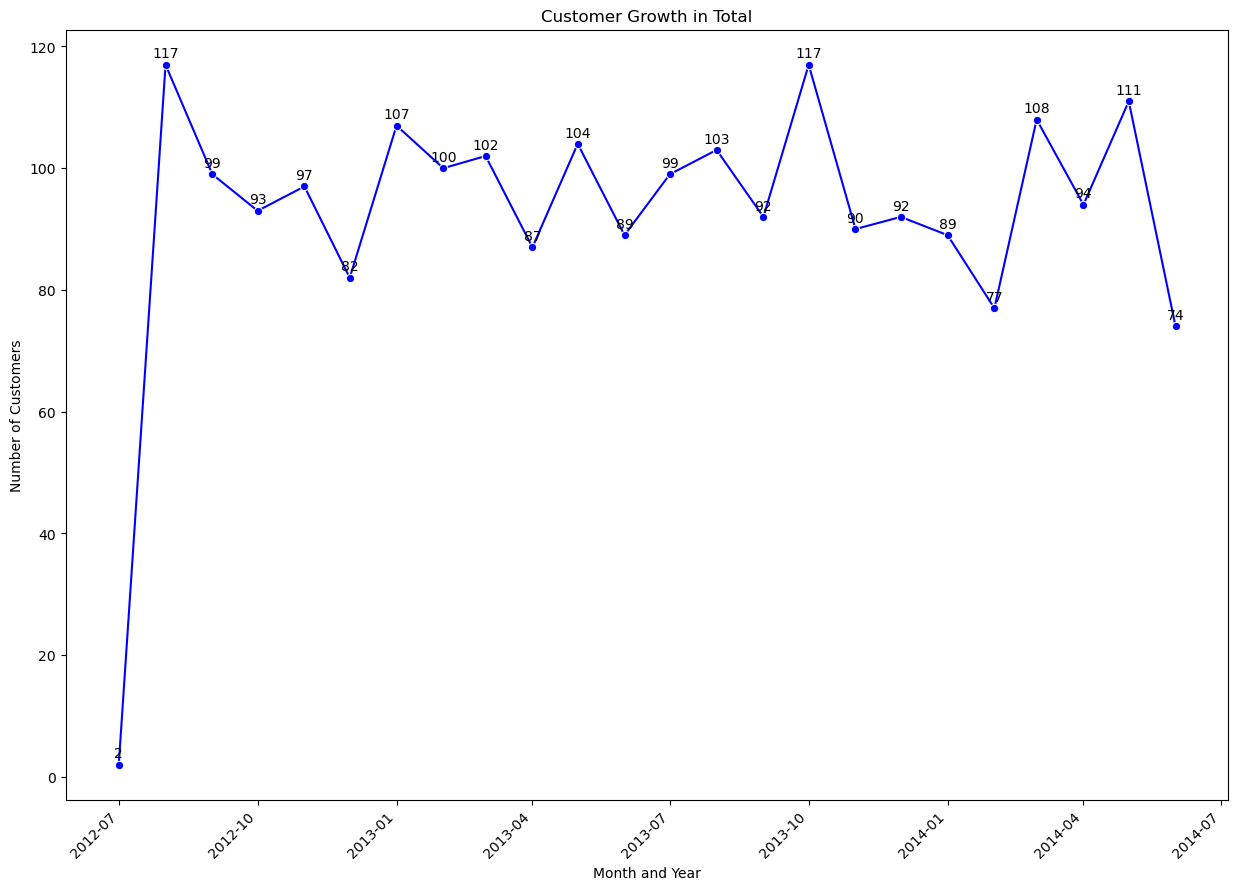

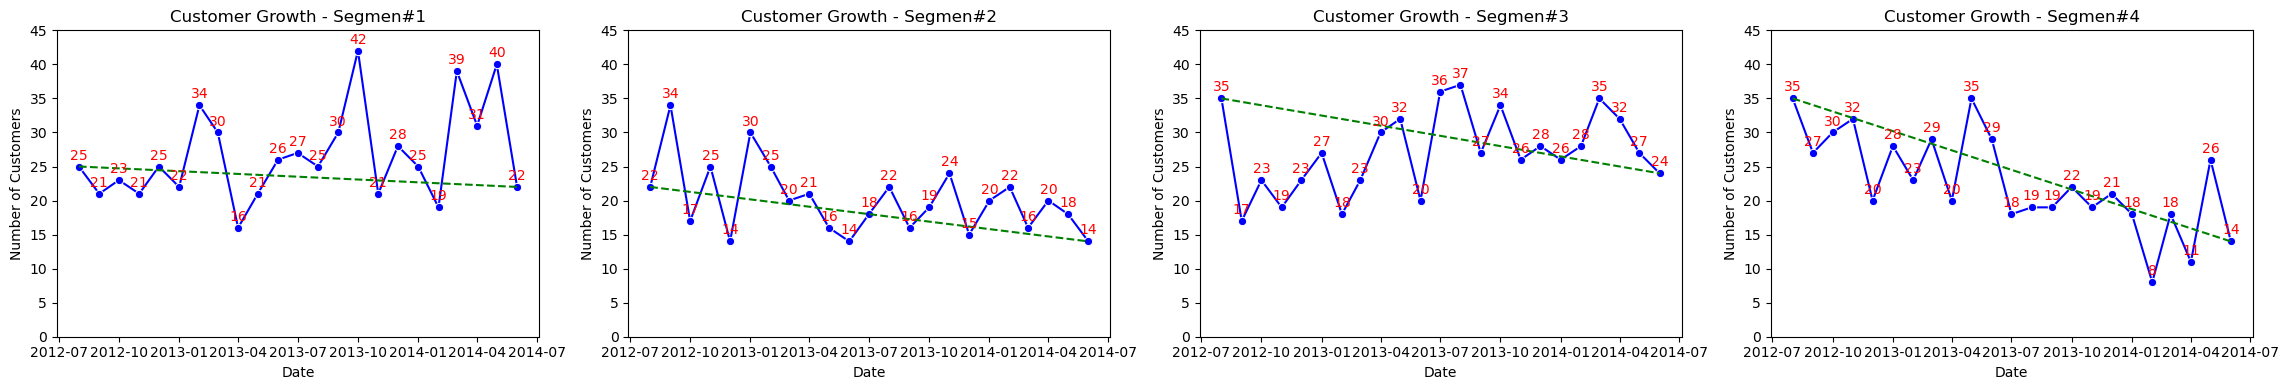

In [59]:
# Graph trendline pertumbuhan customer secara total
plt.figure(figsize=(15, 10))
sns.lineplot(data=Customer_Growth_Total, x='Dt_Customer', y='Total Customer', marker='o', color='blue')
plt.title('Customer Growth in Total')
plt.xlabel('Month and Year')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
for index, row in Customer_Growth_Total.iterrows():
    plt.annotate(f'{row["Total Customer"]}', (row['Dt_Customer'], row['Total Customer']), textcoords="offset points", xytext=(0,5), ha='center')

# Graph trendline masing-masing segmen
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(23, 4))

for i, segment in enumerate(Customer_Growth_pivot.columns[1:]):
    sns.lineplot(data=Customer_Growth_pivot, x='Periode', y=segment, marker='o', ax=axes[i], color='blue')
    
    trend_start = Customer_Growth_pivot[segment].iloc[0]
    trend_end = Customer_Growth_pivot[segment].iloc[-1]
    axes[i].plot([Customer_Growth_pivot['Periode'].min(), Customer_Growth_pivot['Periode'].max()],
                 [trend_start, trend_end],
                 color='green', linestyle='--', label='Trend Direction')

    for index, row in Customer_Growth_pivot.iterrows():
        axes[i].annotate(f'{int(row[segment])}', (row['Periode'], row[segment]), textcoords="offset points", xytext=(0,5), ha='center', color='red')

    axes[i].set_title(f'Customer Growth - {segment}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Customers')

    axes[i].set_ylim(bottom=0, top=45)

plt.tight_layout()
plt.show()


Hasil analisa tingkat prioritas berdasarkan customer growth trend:
- Secara keseluruhan, pertumbuhan pelanggan Supermarket X cukup stabil dalam 2 tahun terakhir. Namun periode terkini terjadi penurunan yang juga menjadi merupakan tingkat pertumbuhan customer paling rendah sepanjang 2 tahun terakhir.
- Penurunan pertumbuhan terjadi secara konsisten pada segmen potensial Supermarket X. Trend penurunan paling besar terjadi pada segmen #4. Segmen #2 juga mengalami penurunan pertumbuhan yang cukup konsisten. Lebih jauh, pertumbuhan customer segmen ini di tiap bulannya pada periode 2 tahun terakhir juga cukup rendah. Bahkan dampaknya membuat segmen potensial ini memiliki proporsi paling rendah dibandingkan ketiga segmen lainnya.
- Sementara itu, pertumbuhan segmen #1 dan #3 terindikasi cukup stabil dan cenderung tumbuh. Sayangnya pertumbuhan customer Supermarket X datang dari segmen pelanggan yang memiliki tingkat potensial yang kurang ideal dibandingkan dua segmen lainnya.

### Kesimpulan analisa:

Berdasarkan dua parameter `karakteristik` dan `growth trend` dapat disimpulkan bahwa Supermarket X memiliki dua segmen potensial yang perlu difokuskan lebih dalam yaitu `Segmen #2` dan `Segmen #4`. 

Alasan kedua segmen ini potensial dan prioritas untuk difokuskan ialah:
- Kedua segmen ini terbukti memiliki tingkat kontribusi Monetary dan Frequency yang tinggi untuk berbelanja di Supermarket X. Dengan memfokuskan dan menumbuhkan kedua segmen ini dapat memberikan potensi pemasukan lebih besar bagi Supermarket X ke depan.
- Namun, masalahnya adalah kedua segmen ini malah mengalami penurunan pertumbuhan, artinya semakin sedikit pelanggan dengan karakteristik segmen ini yang datang berbelanja ke Supermarket X. Terlebih, pada segmen #4 rata-rata Recency-nya cukup tinggi yang artinya mereka sudah lama tidak datang ke Supermarket X. 

Oleh karena itu, ke depan Supermarket X sangat penting untuk dapat memberikan atensi dan usaha lebih agar dapat menumbuhkan jumlah pelanggan baru dari kedua segmen tersebut dan mempertahankan pelanggan lama untuk tetap berbelanja di Supermarket X, khususnya pelanggan dari segmen #4.

Untuk segmen #1 dan #3, Supermarket X tetap perlu memperhatikan dan memberikan usaha agar segmen ini tetap dapat tumbuh. Hanya saja, prioritas segmen ini dapat difokuskan setelah masalah kedua segmen utama terselesaikan.

## **E.2. Bagaimana menumbuhkan dan mempertahankan pelanggan potensial Supermarket X?**

### Analisa profil dan demografi pelanggan potensial Supermarket X:


**Distribusi demografi berdasarkan Usia:**

In [60]:
# Membuat dataframe usia dan pengelompokan menjadi kategori usia baru
age = df[['Year_Birth', 'Cluster_1']]
age ['Age'] = 2014 - df['Year_Birth']

age_bins = [0, 19, 36, 51, 66, float('inf')]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']

age['Age_Group'] = pd.cut(age['Age'], bins=age_bins, labels=age_labels, right=False)
age


C:\Users\User\AppData\Local\Temp\ipykernel_16228\439171747.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_16228\439171747.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year_Birth,Cluster_1,Age,Age_Group
0,1957,Segmen#4,57,51-65
1,1954,Segmen#1,60,51-65
2,1965,Segmen#2,49,36-50
3,1984,Segmen#1,30,19-35
4,1981,Segmen#3,33,19-35
...,...,...,...,...
2235,1967,Segmen#2,47,36-50
2236,1946,Segmen#3,68,66+
2237,1981,Segmen#4,33,19-35
2238,1956,Segmen#2,58,51-65


In [61]:
age.head(30)

,Year_Birth,Cluster_1,Age,Age_Group
0,1957,Segmen#4,57,51-65
1,1954,Segmen#1,60,51-65
2,1965,Segmen#2,49,36-50
3,1984,Segmen#1,30,19-35
4,1981,Segmen#3,33,19-35
5,1967,Segmen#2,47,36-50
6,1971,Segmen#2,43,36-50
7,1985,Segmen#1,29,19-35
8,1974,Segmen#1,40,36-50
9,1950,Segmen#3,64,51-65


In [62]:
# membuat tabel pivot untuk kelompok usia berdasarkan segmen
Age_Grouped_Cluster = age.groupby(['Cluster_1', 'Age_Group']).size().reset_index(name='Count')
Age_Grouped_Cluster = Age_Grouped_Cluster.pivot(index='Age_Group', columns='Cluster_1', values='Count').fillna(0)
Age_Grouped_Cluster['Total'] = Age_Grouped_Cluster.sum(axis=1)
Age_Grouped_Cluster = Age_Grouped_Cluster [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]

# Mengubah tabel dalam bentuk persentase agar dapat dibandingkan dengan lebih terstandar
Age_Grouped_Cluster = Age_Grouped_Cluster.div(Age_Grouped_Cluster.sum(), axis= 1) * 100
Age_Grouped_Cluster.fillna(0).round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
Age_Group,,,,,
0-18,0.09,0.16,0.00,0.16,0.00
19-35,21.26,23.98,20.52,24.36,14.97
36-50,45.44,50.90,40.39,46.66,42.03
51-65,29.75,23.49,33.69,26.43,37.62
66+,3.46,1.47,5.40,2.39,5.37


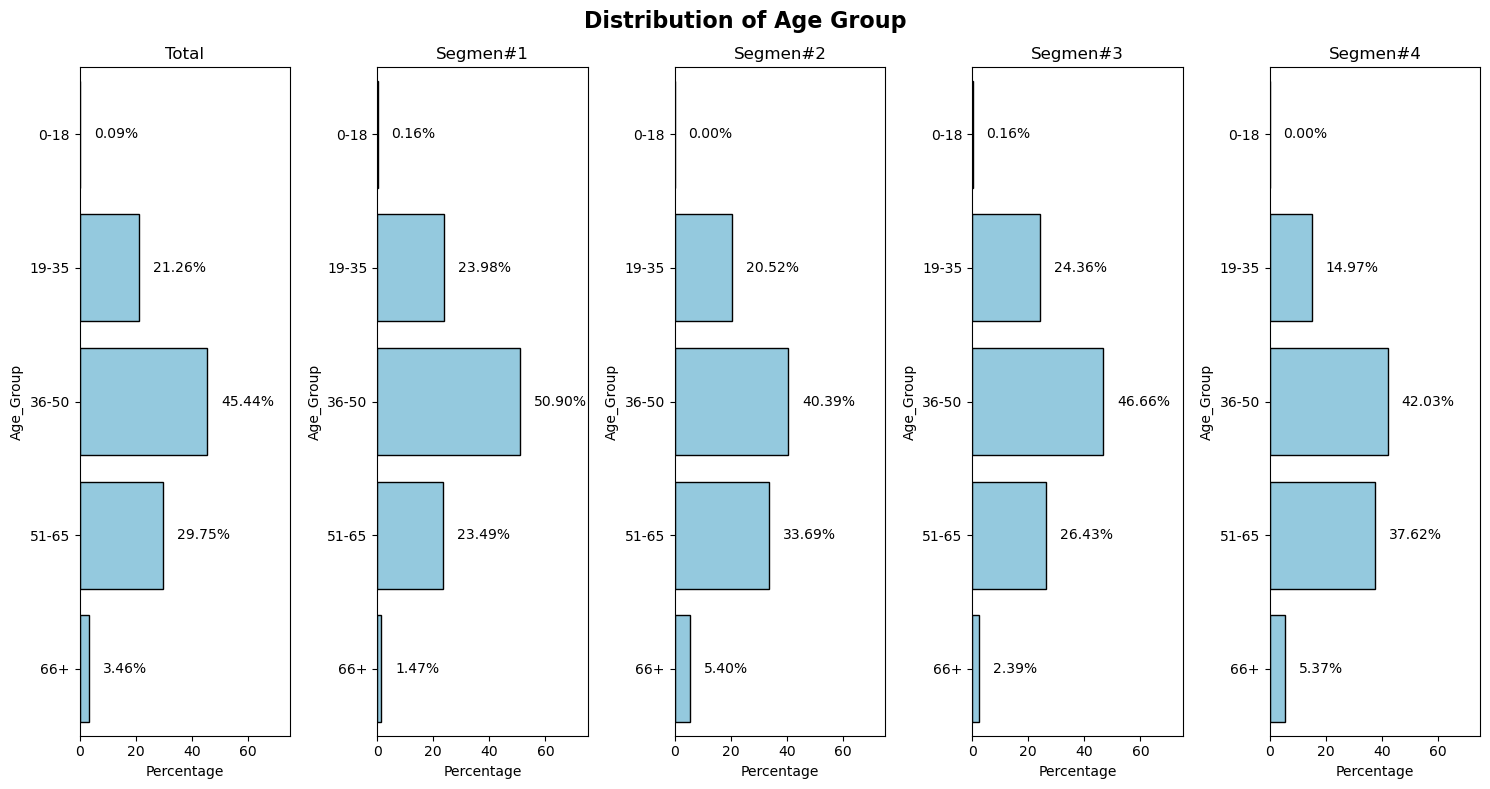

In [63]:
columns = Age_Grouped_Cluster.columns

# Buat subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 8))
fig.suptitle('Distribution of Age Group', fontsize=16, fontweight='bold')


# Horizontal barplot
for i, column in enumerate(columns):
    sns.barplot(y=Age_Grouped_Cluster.index, x=Age_Grouped_Cluster[column], ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Percentage')
    axes[i].set_yticklabels(Age_Grouped_Cluster.index, ha='right')
    axes[i].set_xlim(left=0, right=75)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', ha='left', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

Hasil Analisa:
- Secara umum, pelanggan Supermarket X mayoritas berada di kelompok usia 36 - 50, diikuti oleh kelompok usia 51 - 65.
- Kedua segmen potensial dan prioritas (#2 dan #4) memiliki kencenderungan datang dari kelompok usia lebih tua, dimana kedua segmen ini memiliki komposisi kelompok usia 51 - 65 dan +66 yang lebih tinggi dibandingkan distribusi total.
- Sementara itu, segmen #1 dan #3 cenderung berada di kelompok usia lebih muda, dibuktikan tingkat proporsi yang lebih tinggi dibandingkan distribusi total pada kelompok usia 19 - 35 dan 36 - 50


Berdasarkan hasil ini maka dapat dikatakan bahwa berdasarkan profil usia pelanggan potensial Supermarket X datang dari pelanggan yang cenderung berusia tua.

**Distribusi demografi berdasarkan tingkat pendidikan:**

In [64]:
# Membuat dataframe tingkat edukasi
education = df[['Education', 'Cluster_1']]
education

,Education,Cluster_1
0,Graduation,Segmen#4
1,Graduation,Segmen#1
2,Graduation,Segmen#2
3,Graduation,Segmen#1
4,PhD,Segmen#3
...,...,...
2235,Graduation,Segmen#2
2236,PhD,Segmen#3
2237,Graduation,Segmen#4
2238,Master,Segmen#2


In [65]:
# membuat tabel pivot untuk kelompok edukasi berdasarkan segmen
Education_Grouped_Cluster = education.groupby(['Cluster_1', 'Education']).size().reset_index(name='Count')
Education_Grouped_Cluster = Education_Grouped_Cluster.pivot(index='Education', columns='Cluster_1', values='Count').fillna(0)
Education_Grouped_Cluster['Total'] = Education_Grouped_Cluster.sum(axis=1)
Education_Grouped_Cluster = Education_Grouped_Cluster [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]

# Mengubah tabel dalam bentuk persentase agar dapat dibandingkan dengan lebih terstandar
Education_Grouped_Cluster = Education_Grouped_Cluster.div(Education_Grouped_Cluster.sum(), axis= 1) * 100
Education_Grouped_Cluster.fillna(0).round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
Education,,,,,
2n Cycle,9.03,9.79,9.50,10.19,6.33
Basic,2.43,4.40,0.00,4.14,0.19
Graduation,50.47,47.80,51.62,50.64,52.40
Master,16.54,16.97,16.41,17.52,14.97
PhD,21.53,21.04,22.46,17.52,26.10


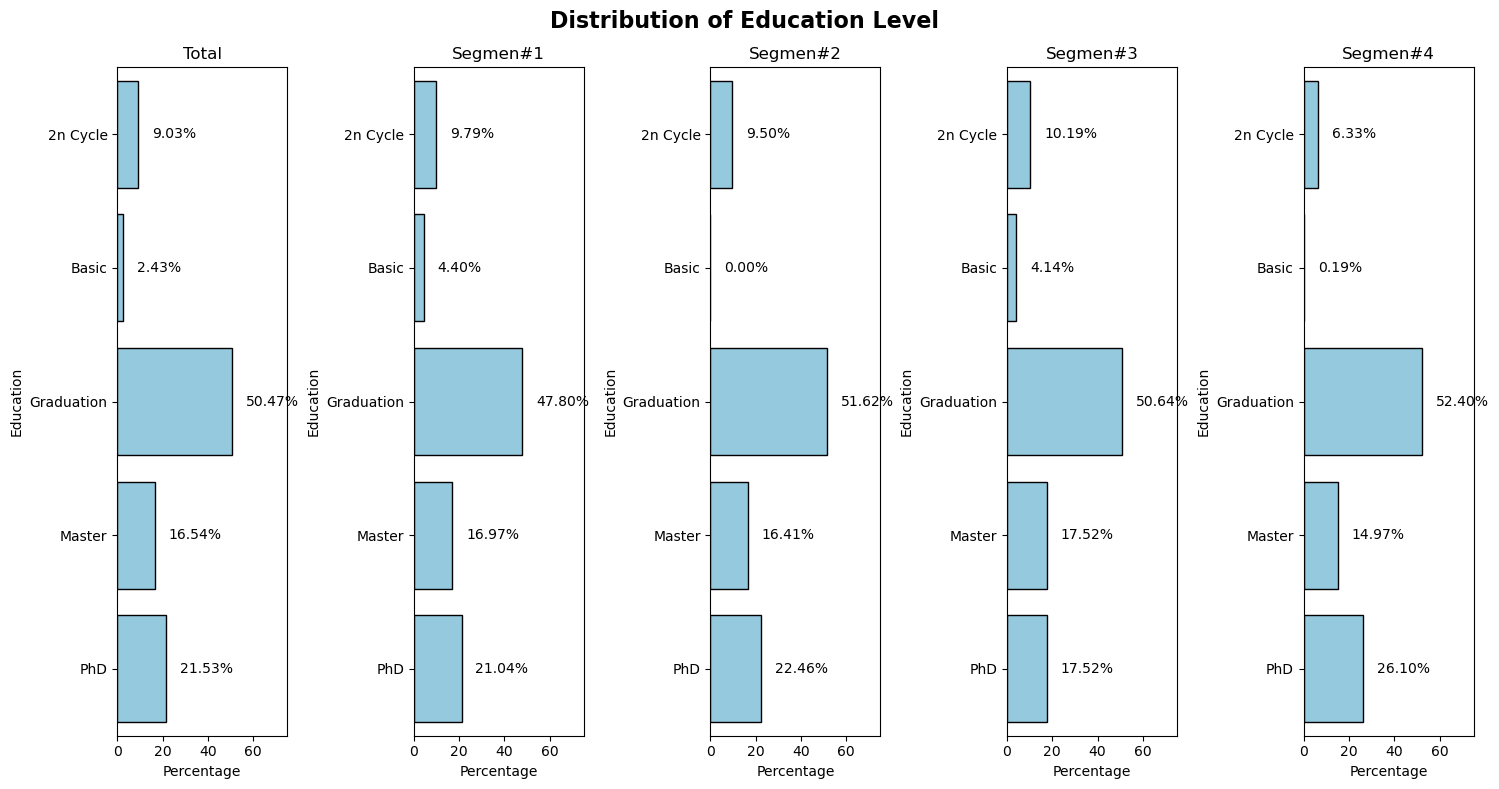

In [66]:
columns = Education_Grouped_Cluster.columns

# Buat subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 8))
fig.suptitle('Distribution of Education Level', fontsize=16, fontweight='bold')

# Horizontal barplot
for i, column in enumerate(columns):
    sns.barplot(y=Education_Grouped_Cluster.index, x=Education_Grouped_Cluster[column], ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Percentage')
    axes[i].set_yticklabels(Education_Grouped_Cluster.index, ha='right')
    axes[i].set_xlim(left=0, right=75)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', ha='left', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

Hasil Analisa:
- Secara umum, pelanggan Supermarket X mayoritas memiliki tingkat pendidikan Graduation. Berikutnya, tingkat pendidikan tertinggi kedua ialah PhD
- Hasil yang serupa ditemukan pada perbandingan antar segmen. Tiap segmen memiliki distribusi tingkat pendidikan yang serupa dengan total. Kemudian tidak ditemukan perbedaan yang besar pada tiap tingkat pendidikan antar segmen.

**Distribusi demografi berdasarkan tingkat Marital_Status**

In [67]:
# Membuat dataframe marital_status
Marital_Status = df[['Marital_Status', 'Cluster_1']]
Marital_Status

,Marital_Status,Cluster_1
0,Single,Segmen#4
1,Single,Segmen#1
2,Together,Segmen#2
3,Together,Segmen#1
4,Married,Segmen#3
...,...,...
2235,Married,Segmen#2
2236,Together,Segmen#3
2237,Divorced,Segmen#4
2238,Together,Segmen#2


In [68]:
# membuat tabel pivot untuk kelompok marital status berdasarkan segmen
Marital_Grouped_Cluster = Marital_Status.groupby(['Cluster_1', 'Marital_Status']).size().reset_index(name='Count')
Marital_Grouped_Cluster = Marital_Grouped_Cluster.pivot(index='Marital_Status', columns='Cluster_1', values='Count').fillna(0)
Marital_Grouped_Cluster['Total'] = Marital_Grouped_Cluster.sum(axis=1)
Marital_Grouped_Cluster = Marital_Grouped_Cluster [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]

# Mengubah tabel dalam bentuk persentase agar dapat dibandingkan dengan lebih terstandar
Marital_Grouped_Cluster = Marital_Grouped_Cluster.div(Marital_Grouped_Cluster.sum(), axis= 1) * 100
Marital_Grouped_Cluster = Marital_Grouped_Cluster.sort_values(by='Total', ascending=False)
Marital_Grouped_Cluster.fillna(0).round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
Marital_Status,,,,,
Married,38.70,41.60,39.09,37.10,36.85
Together,25.84,23.82,25.27,28.66,25.34
Single,21.66,21.86,20.95,22.77,20.73
Divorced,10.34,9.62,10.58,9.55,11.90
Widow,3.46,3.10,4.10,1.91,5.18


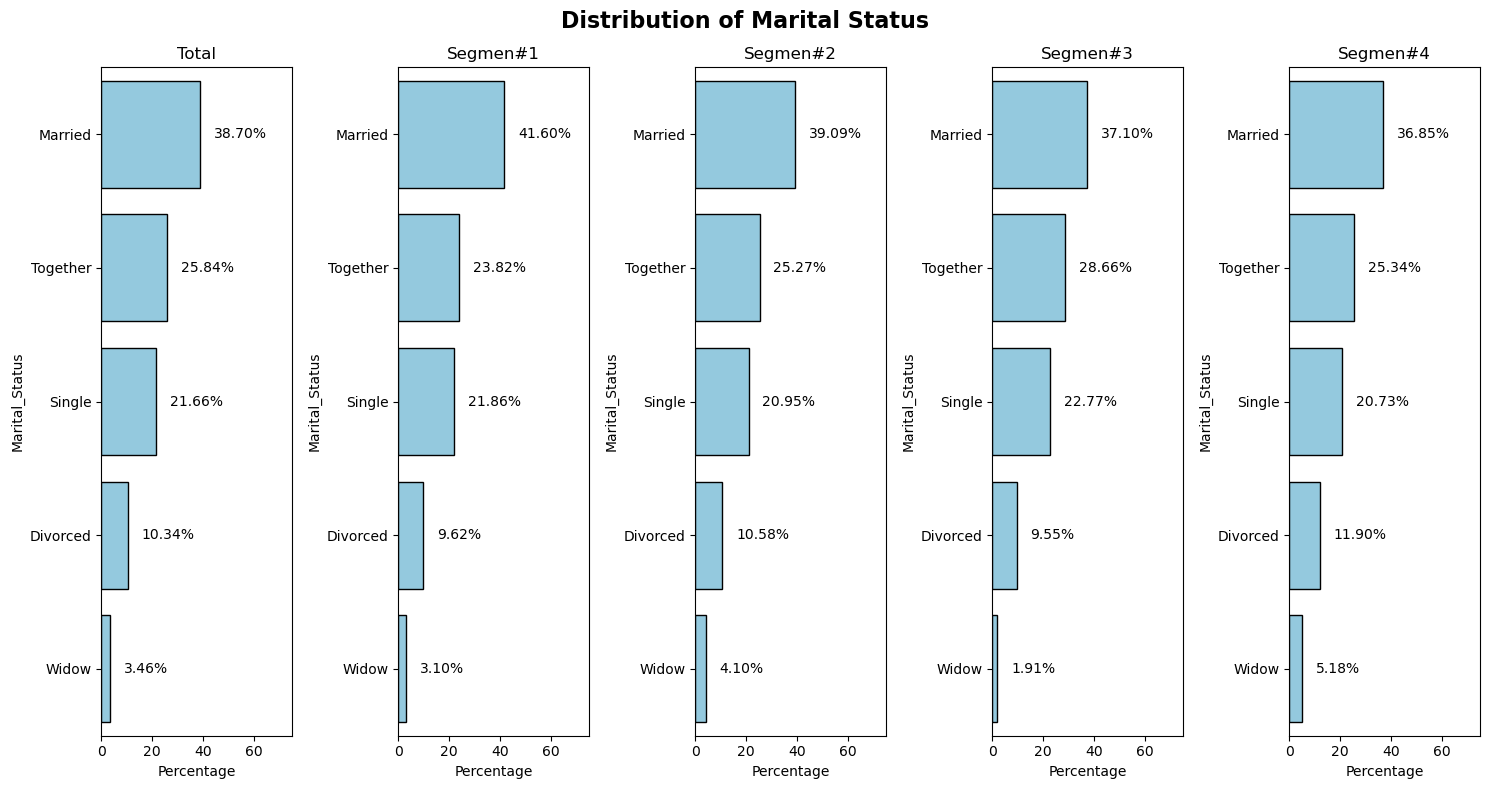

In [69]:
columns = Marital_Grouped_Cluster.columns

# Buat subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 8))
fig.suptitle('Distribution of Marital Status', fontsize=16, fontweight='bold')


# Horizontal barplot
for i, column in enumerate(columns):
    sns.barplot(y=Marital_Grouped_Cluster.index, x=Marital_Grouped_Cluster[column], ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Percentage')
    axes[i].set_yticklabels(Marital_Grouped_Cluster.index, ha='right')
    axes[i].set_xlim(left=0, right=75)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', ha='left', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

Hasil Analisa:
- Secara umum, pelanggan Supermarket X mayoritas memiliki status pernikahan Married, diikuti oleh Together. Artinya mayoritas pelanggan yang datang/berbelanja ke Supermarket X adalah pasangan.
- Hasil yang serupa ditemukan pada perbandingan antar segmen. Tiap segmen memiliki distribusi status pernikahan yang serupa dengan total. Kemudian tidak ditemukan perbedaan yang besar pada tiap tingkat pendidikan antar segmen.

**Distribusi demografi berdasarkan tingkat Parent Status**

In [70]:
# Membuat dataframe parent status
Parent_Status = df[['Parent_Status', 'Cluster_1']]
Parent_Status

,Parent_Status,Cluster_1
0,Non-Parent,Segmen#4
1,Parent,Segmen#1
2,Non-Parent,Segmen#2
3,Parent,Segmen#1
4,Parent,Segmen#3
...,...,...
2235,Parent,Segmen#2
2236,Parent,Segmen#3
2237,Non-Parent,Segmen#4
2238,Parent,Segmen#2


In [71]:
# membuat tabel pivot untuk kelompok parent status berdasarkan segmen
Parent_Grouped_Cluster = Parent_Status.groupby(['Cluster_1', 'Parent_Status']).size().reset_index(name='Count')
Parent_Grouped_Cluster = Parent_Grouped_Cluster.pivot(index='Parent_Status', columns='Cluster_1', values='Count').fillna(0)
Parent_Grouped_Cluster['Total'] = Parent_Grouped_Cluster.sum(axis=1)
Parent_Grouped_Cluster = Parent_Grouped_Cluster [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]

# Mengubah tabel dalam bentuk persentase agar dapat dibandingkan dengan lebih terstandar
Parent_Grouped_Cluster = Parent_Grouped_Cluster.div(Parent_Grouped_Cluster.sum(), axis= 1) * 100
Parent_Grouped_Cluster = Parent_Grouped_Cluster.sort_values(by='Total', ascending=False)
Parent_Grouped_Cluster.fillna(0).round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
Parent_Status,,,,,
Parent,71.64,87.11,50.76,88.69,51.44
Non-Parent,28.36,12.89,49.24,11.31,48.56


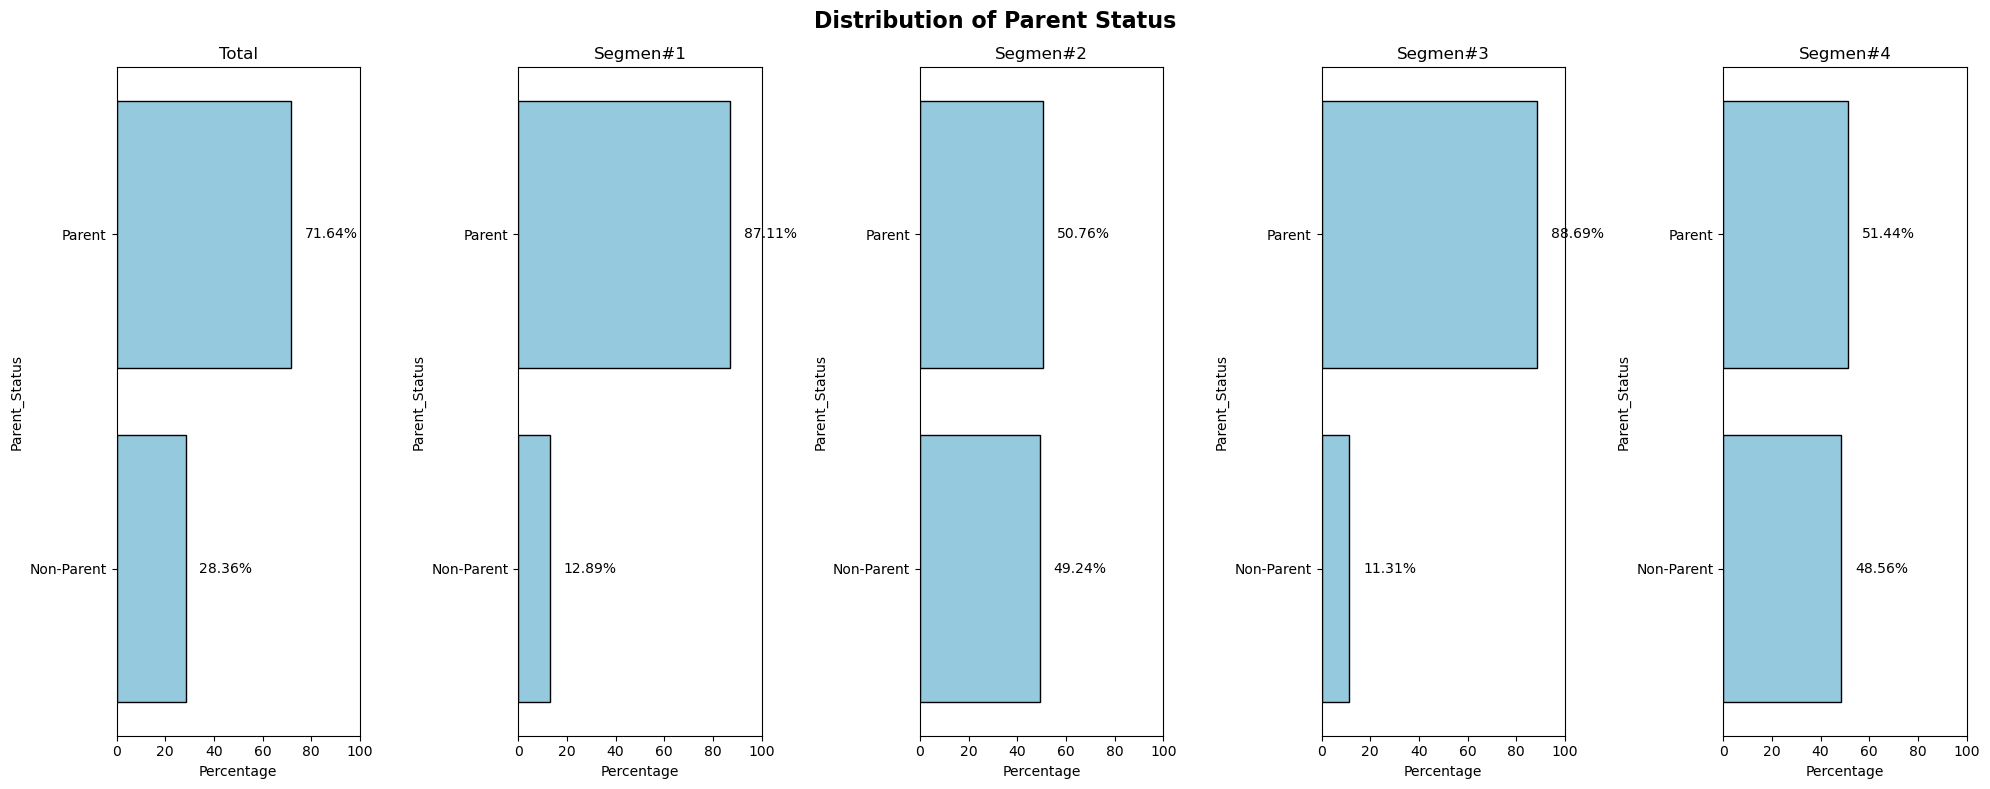

In [72]:
columns = Parent_Grouped_Cluster.columns

# Buat subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 8))
fig.suptitle('Distribution of Parent Status', fontsize=16, fontweight='bold')

# Horizontal barplot
for i, column in enumerate(columns):
    sns.barplot(y=Parent_Grouped_Cluster.index, x=Parent_Grouped_Cluster[column], ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Percentage')
    axes[i].set_yticklabels(Parent_Grouped_Cluster.index, ha='right')
    axes[i].set_xlim(left=0, right=100)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', ha='left', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

Hasil Analisa:
- Secara umum, pelanggan Supermarket X mayoritas merupakan seorang orangtua. 
- Dilihat per segmen, segmen customer potensial Supermarket X (#2 dan #4) ternyata memiliki kecenderungan yang lebih tinggi sebagai pelanggan yang tidak menjadi orang tua/tidak memiliki anak. Sementara itu, kebalikannya segmen pelanggan yang kurang potensial (#1 dan #3) cenderung merupakan pelanggan yang merupakan orang tua / memiliki anak

**Distribusi demografi berdasarkan tingkat #of children**

In [73]:
# Membuat dataframe Jumlah_Anak

Jumlah_anak = df[['Teenhome', 'Kidhome', 'Cluster_1']]
Jumlah_anak ['Total_Anak'] = Jumlah_anak ['Teenhome'] + Jumlah_anak['Kidhome']


# drop data dengan Total_Anak = 0
Jumlah_anak = Jumlah_anak[Jumlah_anak['Total_Anak'] != 0]

Jumlah_anak['Total_Anak'] = Jumlah_anak['Total_Anak'].astype(str)
Jumlah_anak

C:\Users\User\AppData\Local\Temp\ipykernel_16228\3220120340.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Teenhome,Kidhome,Cluster_1,Total_Anak
1,1,1,Segmen#1,2
3,0,1,Segmen#1,1
4,0,1,Segmen#3,1
5,1,0,Segmen#2,1
6,1,0,Segmen#2,1
...,...,...,...,...
2234,0,1,Segmen#3,1
2235,1,0,Segmen#2,1
2236,1,2,Segmen#3,3
2238,1,0,Segmen#2,1


In [74]:
# membuat tabel pivot untuk kelompok Jumlah Anak berdasarkan segmen
Children_Grouped_Cluster = Jumlah_anak.groupby(['Cluster_1', 'Total_Anak']).size().reset_index(name='Count')
Children_Grouped_Cluster = Children_Grouped_Cluster.pivot(index='Total_Anak', columns='Cluster_1', values='Count').fillna(0)
Children_Grouped_Cluster['Total'] = Children_Grouped_Cluster.sum(axis=1)
Children_Grouped_Cluster = Children_Grouped_Cluster [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]

# Mengubah tabel dalam bentuk persentase agar dapat dibandingkan dengan lebih terstandar
Children_Grouped_Cluster = Children_Grouped_Cluster.sort_values(by='Total_Anak', ascending=True)
Children_Grouped_Cluster = Children_Grouped_Cluster.div(Children_Grouped_Cluster.sum(), axis= 1) * 100
Children_Grouped_Cluster.fillna(0).round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
Total_Anak,,,,,
1,70.33,66.10,84.68,61.94,83.58
2,26.35,30.52,14.47,33.03,14.55
3,3.32,3.37,0.85,5.03,1.87


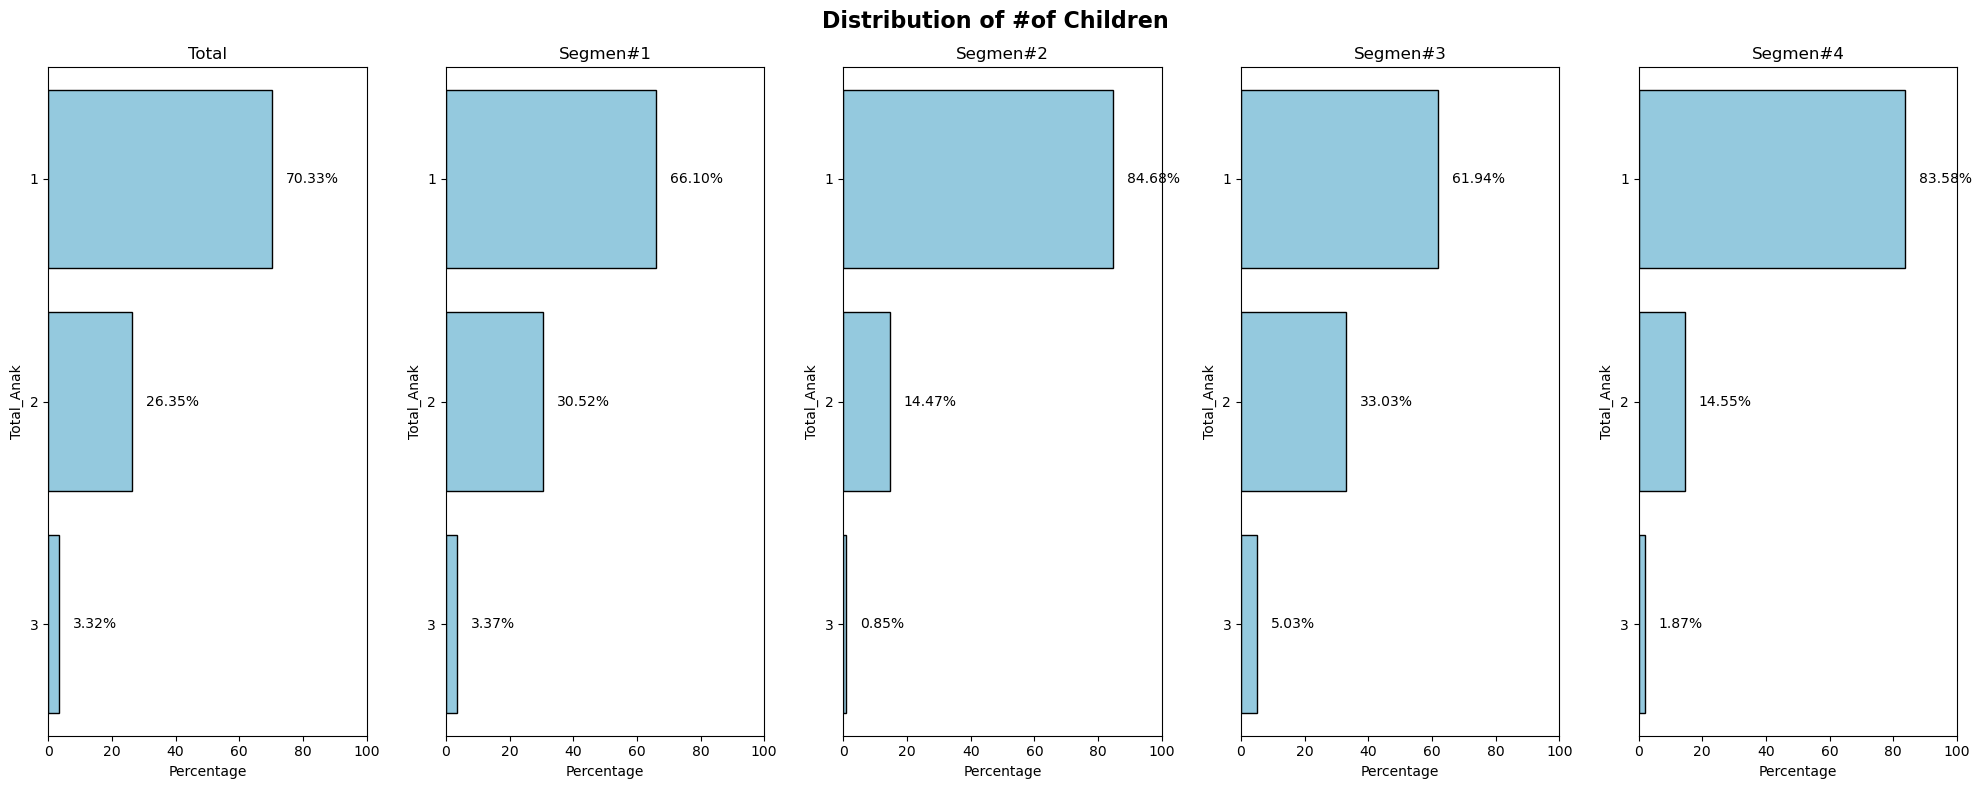

In [75]:
columns = Children_Grouped_Cluster.columns

# Buat subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 8))
fig.suptitle('Distribution of #of Children', fontsize=16, fontweight='bold')


# Horizontal barplot
for i, column in enumerate(columns):
    sns.barplot(y=Children_Grouped_Cluster.index, x=Children_Grouped_Cluster[column], ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Percentage')
    axes[i].set_yticklabels(Children_Grouped_Cluster.index, ha='right')
    axes[i].set_xlim(left=0, right=100)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', ha='left', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

Hasil Analisa:
- Secara umum, rata-rata pelanggan Supermarket X yang menjadi orangtua memiliki satu anak. 
- Dilihat per segmen, segmen customer potensial Supermarket X (#2 dan #4) cenderung hanya memiliki satu anak. Sementara itu, kebalikannya segmen pelanggan yang kurang potensial (#1 dan #3) cenderung memiliki anak lebih dari 1

Distribusi demografi berdasarkan tingkat Income

In [76]:
# Membuat dataframe income dan pengelompokan menjadi kategori income baru
Income = df[['Income', 'Cluster_1']]

Income_bins = [0, 20001, 40001, 60001, 80001, 100001, float('inf')]
Income_labels = ['0-20000', '20001-40000', '40001-60000', '60001-80000', '80001-100000', '>100000']

Income['Income_group'] = pd.cut(Income['Income'], bins=Income_bins, labels=Income_labels, right=False)
Income

C:\Users\User\AppData\Local\Temp\ipykernel_16228\1856313697.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Income,Cluster_1,Income_group
0,58138.0,Segmen#4,40001-60000
1,46344.0,Segmen#1,40001-60000
2,71613.0,Segmen#2,60001-80000
3,26646.0,Segmen#1,20001-40000
4,58293.0,Segmen#3,40001-60000
...,...,...,...
2235,61223.0,Segmen#2,60001-80000
2236,64014.0,Segmen#3,60001-80000
2237,56981.0,Segmen#4,40001-60000
2238,69245.0,Segmen#2,60001-80000


In [77]:
# membuat tabel pivot untuk kelompok Income berdasarkan segmen
Income_Grouped_Cluster = Income.groupby(['Cluster_1', 'Income_group']).size().reset_index(name='Count')
Income_Grouped_Cluster = Income_Grouped_Cluster.pivot(index='Income_group', columns='Cluster_1', values='Count').fillna(0)
Income_Grouped_Cluster['Total'] = Income_Grouped_Cluster.sum(axis=1)
Income_Grouped_Cluster = Income_Grouped_Cluster [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]

# Mengubah tabel dalam bentuk persentase agar dapat dibandingkan dengan lebih terstandar
Income_Grouped_Cluster = Income_Grouped_Cluster.sort_values(by='Income_group', ascending=True)
Income_Grouped_Cluster = Income_Grouped_Cluster.div(Income_Grouped_Cluster.sum(), axis= 1) * 100
Income_Grouped_Cluster.fillna(0).round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
Income_group,,,,,
0-20000,5.71,10.11,0.43,9.87,0.19
20001-40000,27.15,48.94,0.43,47.45,0.77
40001-60000,29.89,36.70,17.93,37.90,22.84
60001-80000,27.91,4.24,59.83,4.62,55.47
80001-100000,9.12,0.00,20.73,0.16,20.35
>100000,0.22,0.00,0.65,0.00,0.38


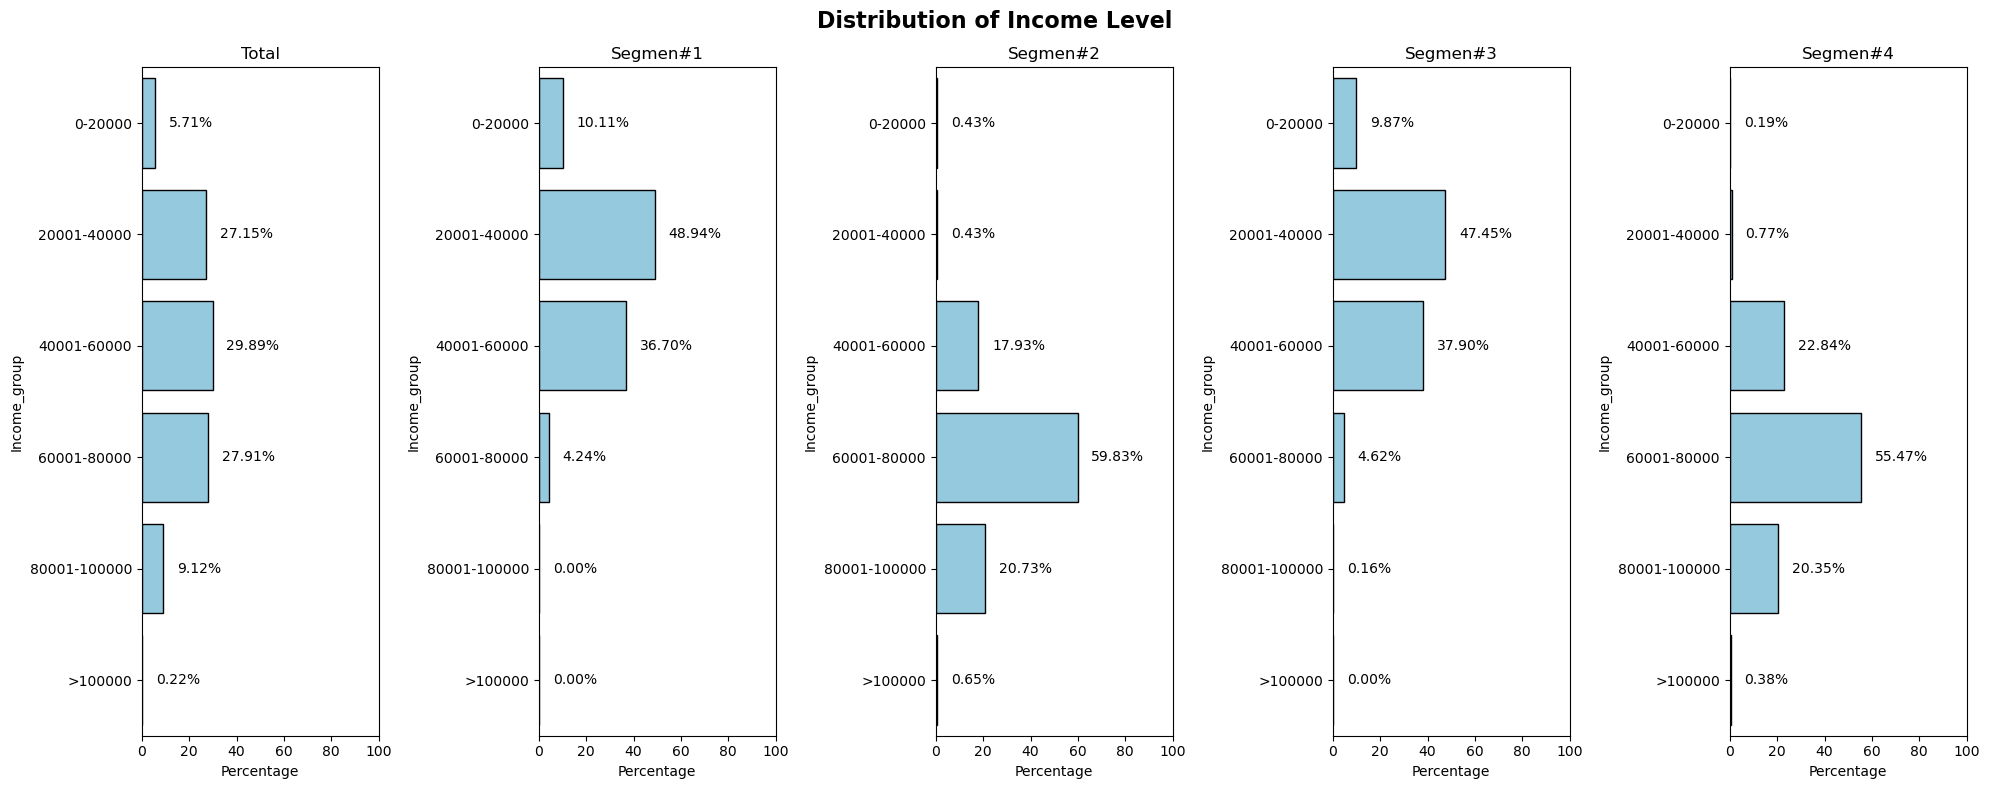

In [78]:
columns = Income_Grouped_Cluster.columns

# Buat subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 8))
fig.suptitle('Distribution of Income Level', fontsize=16, fontweight='bold')


# Horizontal barplot
for i, column in enumerate(columns):
    sns.barplot(y=Income_Grouped_Cluster.index, x=Income_Grouped_Cluster[column], ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Percentage')
    axes[i].set_yticklabels(Income_Grouped_Cluster.index, ha='right')
    axes[i].set_xlim(left=0, right=100)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', ha='left', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

Hasil Analisa:
- Secara umum, mayoritas pelanggan Supermarket X berada di rentang income 20000 - 80000 dollar pertahunnya. 
- Dilihat per segmen, segmen customer potensial Supermarket X (#2 dan #4) cenderung datang dari kelompok dengan income tahunan yang lebih tinggi, dengan mayoritas memiiliki pemasukan di kelompok 60001 - 80000 dollar per tahun. Sementara itu, segmen pelanggan yang kurang potensial (#1 dan #3) cenderung memiliki tingkat pemasukan yang lebih rendah, dengan mayoritas berada di kelompok 20001 - 40000 dollar per tahun.
- Hasil ini semakin menjukkukan tingkat potensi dari segmen #2 dan #4 dimana kelompok pelanggan ini merupakan pelanggan yang memiliki spending power yang lebih besar dibandingkan dua segmen lainnya.

**Kesimpulan:**

- Berdasarkan hasil analisa demografi dan profil karakteristik masing-masing segmen, diketahui bahwa terdapat sejumlah karakteristik unik yang dimiliki oleh kedua kelompok potensial dan kurang potensial pelanggan Supermarket X. Adapun karakteristik yang teridentifikasi tersebut ialah:

    - Segmen pelanggan potensial (#2 dan #4): 
        - Pelanggan dewasa yang lebih tua
        - Memiliki tingkat pendidikan Graduation atau lebih tinggi
        - Pelanggan yang sudah menikah atau memiliki pasangan
        - Bukan orangtua. Apabila merupakan orangtua, umumnya hanya memiliki 1 anak 
        - Memiliki tingkat pemasukan tahunan yang tinggi, rata-rata 60001 - 80000 dollar per tahun

    - Segmen pelanggan kurang potensial (#2 dan #4): 
        - Pelanggan dewasa muda
        - Memiliki tingkat pendidikan Graduation atau lebih tinggi
        - Pelanggan yang sudah menikah atau memiliki pasangan
        - Merupakan orangtua, dan umumnya ada kecenderungan memiliki anak lebih dari 1
        - Memiliki tingkat pemasukan tahunan yang rendah, rata-rata 20001 - 40000 dollar per tahun

- Berdasarkan informasi ini, Supermarket X dapat dengan lebih baik mengetahui karakteristik dan profil pelanggan seperti apa yang potensial atau kurang potensial. Kedepannya melalui informasi profiing ini Supermarket X dapat melakukan serangkaian usaha yang sesuai dengan karakteristik tiap segmen.

### Analisa kebiasaan berbelanja pelanggan potensial Supermarket X:


Setelah mengetahui karakteristik dan profil demografi tiap segmen, kita akan menganalisa perilaku kebiasaan belanja tiap segmen. Informasi kebiasaan berbelanja tiap segmen bermanfaat dalam membantu Supermarket X membuat program/usaha yang sesuai bagi tiap segmen.

**Kebiasaan Produk yang dibeli** 

In [79]:
# Dataframe berisi column jumlah spending di tiap jenis barang
Product_Purchased = df[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Cluster_1']]
Product_Purchased

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Cluster_1
0,635,88,546,172,88,88,Segmen#4
1,11,1,6,2,1,6,Segmen#1
2,426,49,127,111,21,42,Segmen#2
3,11,4,20,10,3,5,Segmen#1
4,173,43,118,46,27,15,Segmen#3
...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,Segmen#2
2236,406,0,30,0,0,8,Segmen#3
2237,908,48,217,32,12,24,Segmen#4
2238,428,30,214,80,30,61,Segmen#2


In [80]:
# membuat tabel pivot untuk kelompok tipe produk pembelian berdasarkan segmen
Product_Purchased_Grouped_Cluster= Product_Purchased.groupby('Cluster_1').sum()
Product_Purchased_Grouped_Cluster = Product_Purchased_Grouped_Cluster.T
Product_Purchased_Grouped_Cluster['Total'] = Product_Purchased_Grouped_Cluster.sum(axis=1)
Product_Purchased_Grouped_Cluster = Product_Purchased_Grouped_Cluster [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]

# Mengubah tabel dalam bentuk persentase agar dapat dibandingkan dengan lebih terstandar
Product_Purchased_Grouped_Cluster = Product_Purchased_Grouped_Cluster.sort_values(by='Total', ascending=False)
Product_Purchased_Grouped_Cluster = Product_Purchased_Grouped_Cluster.div(Product_Purchased_Grouped_Cluster.sum(), axis= 1) * 100
Product_Purchased_Grouped_Cluster.fillna(0).round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
MntWines,50.39,48.97,50.38,47.43,51.05
MntMeatProducts,27.31,21.52,28.32,22.75,27.96
MntGoldProds,7.27,14.03,6.17,13.93,6.22
MntFishProducts,6.20,6.91,6.19,6.55,6.05
MntSweetProducts,4.49,4.14,4.46,4.67,4.55
MntFruits,4.35,4.43,4.49,4.67,4.17


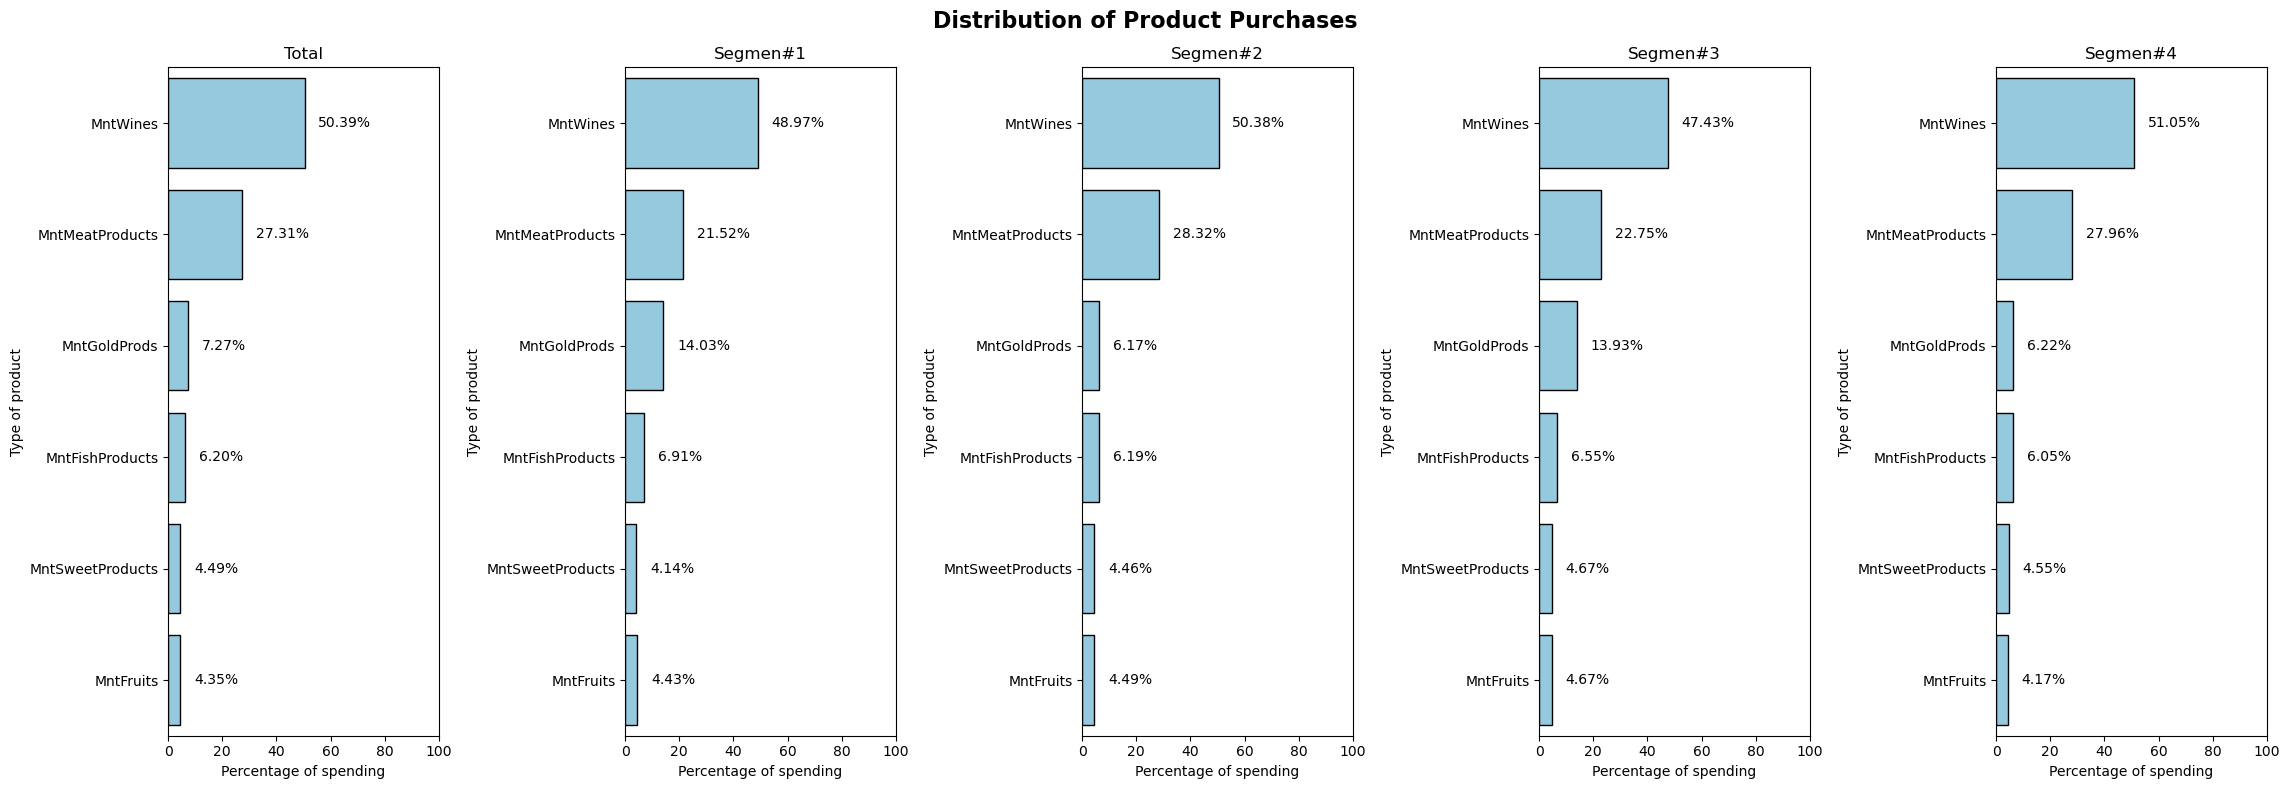

In [81]:
columns = Product_Purchased_Grouped_Cluster.columns

# Buat subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(23, 8))
fig.suptitle('Distribution of Product Purchases', fontsize=16, fontweight='bold')

# Horizontal barplot
for i, column in enumerate(columns):
    sns.barplot(y=Product_Purchased_Grouped_Cluster.index, x=Product_Purchased_Grouped_Cluster[column], ax=axes[i], color='skyblue', edgecolor='black',)
    axes[i].set_title(column)
    axes[i].set_xlabel('Percentage of spending')
    axes[i].set_ylabel('Type of product')
    axes[i].set_yticklabels(Product_Purchased_Grouped_Cluster.index, ha='right')
    axes[i].set_xlim(left=0, right=100)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', ha='left', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

In [82]:
# Rata-rata spending yang dikeluarkan untuk berbelanja tiap jenis barang oleh masing-masing segmen
Product_Purchased_Grouped_Cluster_byValue= Product_Purchased.groupby('Cluster_1').mean()
Product_Purchased_Grouped_Cluster_byValue = Product_Purchased_Grouped_Cluster_byValue.T
Product_Purchased_Grouped_Cluster_byValue['Total'] = Product_Purchased_Grouped_Cluster_byValue.sum(axis=1)/4
Product_Purchased_Grouped_Cluster_byValue = Product_Purchased_Grouped_Cluster_byValue [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]
Product_Purchased_Grouped_Cluster_byValue.round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
MntWines,335.28,73.98,594.85,69.64,602.63
MntFruits,28.93,6.69,52.97,6.85,49.19
MntMeatProducts,182.59,32.50,334.40,33.40,330.07
MntFishProducts,41.14,10.44,73.05,9.61,71.45
MntSweetProducts,29.86,6.26,52.62,6.86,53.68
MntGoldProds,46.99,21.19,72.86,20.45,73.45


Hasil analisa:
- Secara keseluruhan, dalam 2 tahun terakhir produk unggulan Supermarket X adalah Wine dan Meat. Kesimpulan ini dibuktikan dari rata-rata spending pelanggan Supermarket X yang paling tinggi ada pada dua item produk tersebut. Lebih jauh, kedua segmen potensial Supermarket X menunjukkan tingkat pembelanjaan yang sangat tinggi untuk kedua tipe produk ini dalam 2 tahun terakhir.
- Segmen yang kurang potensial (Segmen #1 dan #3), memiliki kecenderungan untuk juga berbelanja produk Gold di Supermarket X. Hanya saja, dari sisi rata-rata pembelanjaan menunjukkan pembelian mereka terjadi dalam nominal yang kecil.
- Sementara itu, produk-produk seperti Buah, Ikan, Jajanan manis, dapat dikatakan memiliki penjualan kurang baik dan berkontribusi kecil terhadap pemasukan Supermarket X karena memiliki rata-rata nominal pembelian yang kecil dari pelanggan Supermarket X.

**Kebiasaan Tempat berbelanja** 

In [83]:
Place_to_Purchase = df[['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','Cluster_1']]
Place_to_Purchase

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Cluster_1
0,8,10,4,Segmen#4
1,1,1,2,Segmen#1
2,8,2,10,Segmen#2
3,2,0,4,Segmen#1
4,5,3,6,Segmen#3
...,...,...,...,...
2235,9,3,4,Segmen#2
2236,8,2,5,Segmen#3
2237,2,3,13,Segmen#4
2238,6,5,10,Segmen#2


In [84]:
# membuat tabel pivot untuk channel berbelanja produk berdasarkan segmen
Place_to_Purchase_Grouped_Cluster= Place_to_Purchase.groupby('Cluster_1').sum()
Place_to_Purchase_Grouped_Cluster = Place_to_Purchase_Grouped_Cluster.T
Place_to_Purchase_Grouped_Cluster['Total'] = Place_to_Purchase_Grouped_Cluster.sum(axis=1)
Place_to_Purchase_Grouped_Cluster = Place_to_Purchase_Grouped_Cluster [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]

# Mengubah tabel dalam bentuk persentase agar dapat dibandingkan dengan lebih terstandar
Place_to_Purchase_Grouped_Cluster = Place_to_Purchase_Grouped_Cluster.sort_values(by='Total', ascending=False)
Place_to_Purchase_Grouped_Cluster = Place_to_Purchase_Grouped_Cluster.div(Place_to_Purchase_Grouped_Cluster.sum(), axis= 1) * 100
Place_to_Purchase_Grouped_Cluster.fillna(0).round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
NumStorePurchases,46.33,52.14,43.90,51.79,43.64
NumWebPurchases,32.67,36.84,31.26,37.13,30.19
NumCatalogPurchases,21.00,11.02,24.84,11.09,26.17


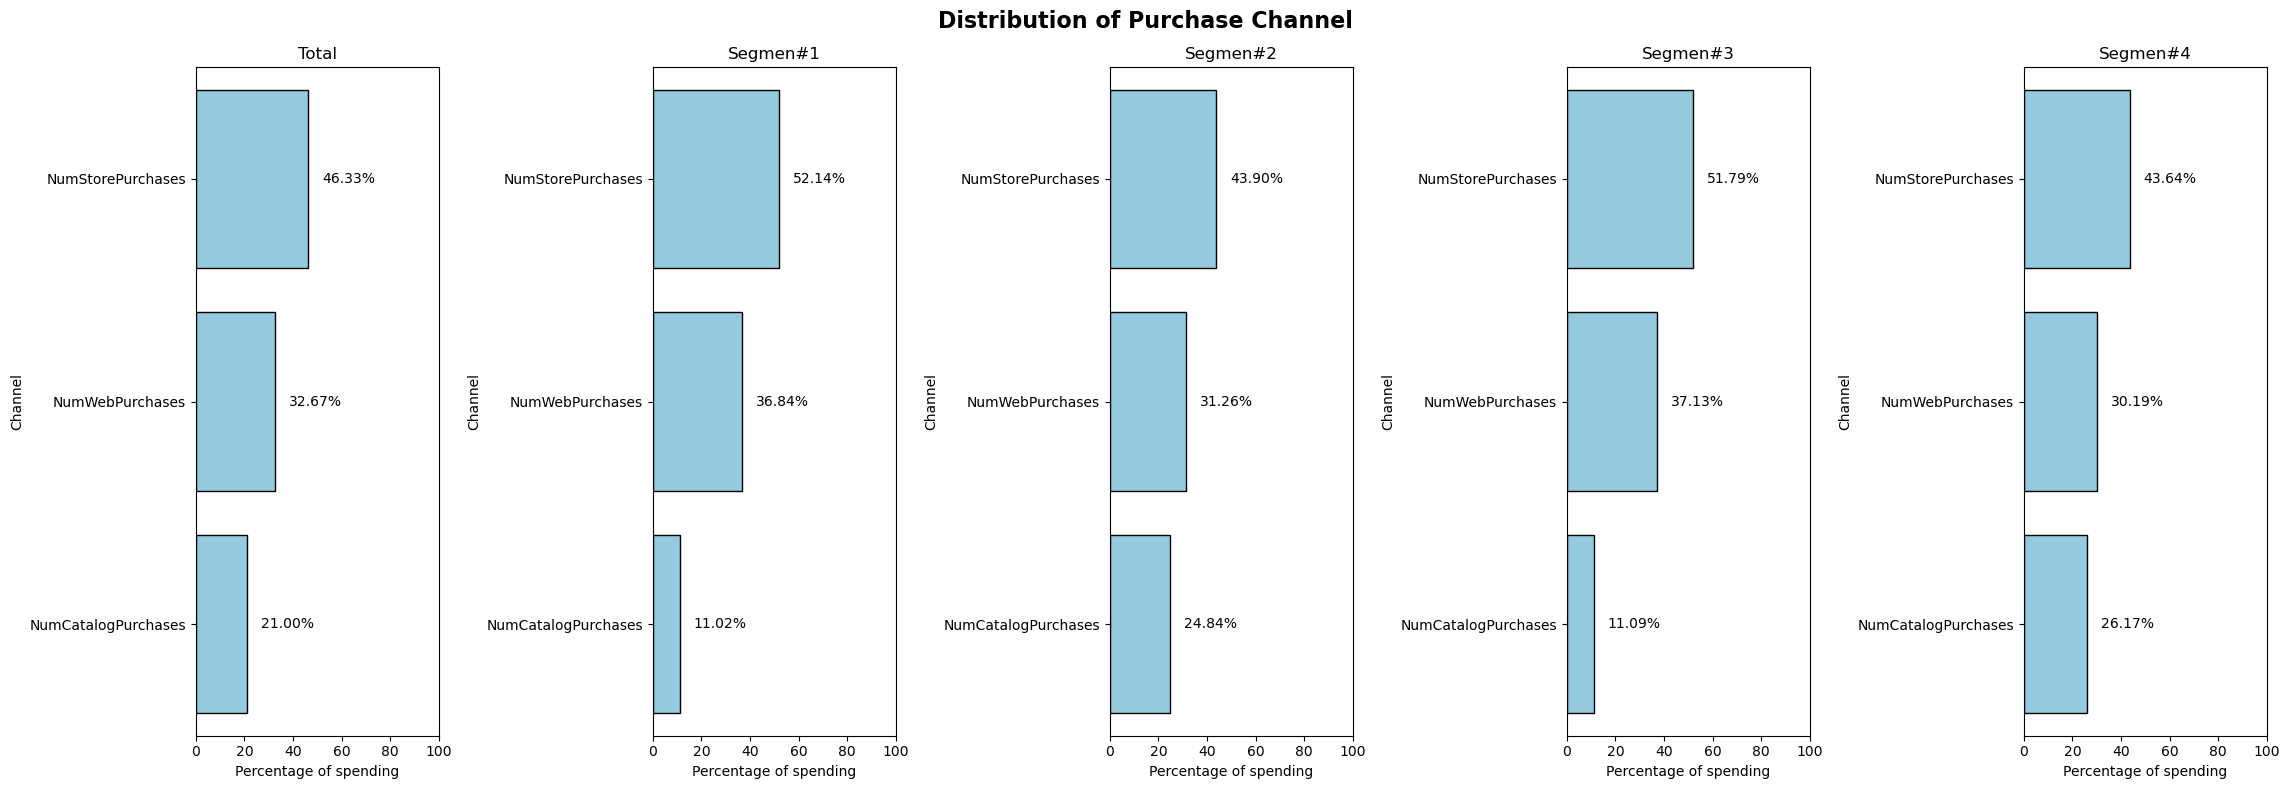

In [85]:
columns = Place_to_Purchase_Grouped_Cluster.columns

# Buat subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(23, 8))
fig.suptitle('Distribution of Purchase Channel', fontsize=16, fontweight='bold')


# Horizontal barplot
for i, column in enumerate(columns):
    sns.barplot(y=Place_to_Purchase_Grouped_Cluster.index, x=Place_to_Purchase_Grouped_Cluster[column], ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Percentage of spending')
    axes[i].set_ylabel('Channel')
    axes[i].set_yticklabels(Place_to_Purchase_Grouped_Cluster.index, ha='right')
    axes[i].set_xlim(left=0, right=100)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', ha='left', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

In [86]:
# Rata-rata frekuensi berbelanja oleh masing-masing segmen

Place_to_Purchase_Grouped_Cluster_bymean = Place_to_Purchase.groupby('Cluster_1').mean()
Place_to_Purchase_Grouped_Cluster_bymean = Place_to_Purchase_Grouped_Cluster_bymean.T
Place_to_Purchase_Grouped_Cluster_bymean['Total'] = Place_to_Purchase_Grouped_Cluster_bymean.sum(axis=1)/4
Place_to_Purchase_Grouped_Cluster_bymean = Place_to_Purchase_Grouped_Cluster_bymean [['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]
Place_to_Purchase_Grouped_Cluster_bymean = Place_to_Purchase_Grouped_Cluster_bymean.sort_values(by='Total', ascending=False)
Place_to_Purchase_Grouped_Cluster_bymean.fillna(0).round(2)

Cluster_1,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
NumStorePurchases,6.10,3.68,8.67,3.64,8.39
NumWebPurchases,4.30,2.60,6.17,2.61,5.81
NumCatalogPurchases,2.87,0.78,4.90,0.78,5.03


Hasil analisa:
- Secara keseluruhan, Pembelian langsung di toko masih menjadi channel penjualan paling efektif bagi Supermarket X dimana rata-rata pelanggan berbelanja paling banyak di toko secara langsung. Namun, penjualan melalui Web bisa menjadi fokus berikutnya karena channel ini menjadi tempat pembelian dengan rata-rata tertinggi kedua.
- Analisa per segmen menunjukkan bahwa selain berbelanja di toko offline, ada kecenderungan dimana Segmen #2 dan #4 juga berbelanja menggunakan catalog, sementara segmen #1 dan #3 juga berbelanja menggunakan website.

**Kesimpulan:**

- Dari hasil ini, Supermarket X dapat memfokuskan melakukan penjualan untuk produk Wine dan Meat agar dapat meningkatkan pendapatan sekaligus memperbesar jumlah pelanggan yang berbelanja di Supermarket X. Salah satu langkah yang dapat dilakukan ialah dengan memperbanyak katalog dan stok untuk kedua jenis produk ini. Harapannya, dengan katalog dan stok yang semakin banyak, calon pelanggan akan bisa menemukan varian apapun ketika sedang mencari kedua produk ini. Dampaknya Supermarket X akan semakin dikenal oleh pelanggan sebagai Supermarket yang memiliki spesialiasai di produk Wine dan Meat. 
- Sementara untuk produk yang kurang memiliki potensi pemasukan yang tinggi (Fruit, Fish, Sweet, dan Gold), Supermarket X dapat menjadikan produk-produk ini sebagai produk pelengkap. Pelanggan tetap dapat menemukan produk-produk tersebut di Supermarket X dalam kapasistas yang cukup/tidak berlebih.

- Kemudian, penjualan barang dapat difokuskan di Toko offline sebagai channel penjualan utama. Website dapat diatur sebagai tambahan untuk menjangkau pelanggan-pelanggan yang berada di luar area Supermarket X. Namun untuk segmen potensial #2 dan #4, Supermarket X dapat melakukan pendekatan penjualan melalui catalog juga.

### Analisa kinerja marketing program pada pelanggan potensial Supermarket X:


Pertama, mari buat variabel baru untuk setiap kolom yang berkaitan dengan aktivitas marketing Supermarket X

In [87]:
Marketing = df [['NumDealsPurchases',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp6', 'Cluster_1']]
Marketing

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Cluster_1
0,3,0,0,0,0,0,1,Segmen#4
1,2,0,0,0,0,0,0,Segmen#1
2,1,0,0,0,0,0,0,Segmen#2
3,2,0,0,0,0,0,0,Segmen#1
4,5,0,0,0,0,0,0,Segmen#3
...,...,...,...,...,...,...,...,...
2235,2,0,0,0,0,0,0,Segmen#2
2236,7,1,0,0,0,0,0,Segmen#3
2237,1,0,0,0,1,0,0,Segmen#4
2238,2,0,0,0,0,0,0,Segmen#2


**Analisa tingkat ketertarikan pelanggan terhadap promosi marketing**

In [88]:
# Pengujian normalitas test terhadap column NumDealsPurchases

statistic, p_value = shapiro(Marketing['NumDealsPurchases'])

print(f'Statistic: {statistic}, p-value: {p_value}')
if p_value > 0.05:
    print(' H0 is accepted: The NumDealsPurchases appears to be normally distributed.')
else:
    print('H0 is rejected: The data does not appear to be normally distributed.')

Statistic: 0.7459387183189392, p-value: 0.0
H0 is rejected: The data does not appear to be normally distributed.


Distribusi data column NumDealsPurchase tidak terdistribusi dengan normal. Maka teknik analisa statistik yang perlu dilakukan adalah Kruskal-Wallis

In [89]:
#Uji kruskal-wallis

cluster_1_data = [Marketing['NumDealsPurchases'][Marketing['Cluster_1'] == cluster] for cluster in Marketing['Cluster_1'].unique()]
h_stat, p_value = kruskal(*cluster_1_data)

print(f'Kruskal-Wallis test: H-statistic = {h_stat}, p-value = {p_value}')
if p_value < 0.05:
    print(' Result: H0 is rejected -> There are significant differences between the groups.')
else:
    print('Result: H0 is accepted -> There are no significant differences between the groups.')

Kruskal-Wallis test: H-statistic = 20.066382244662176, p-value = 0.00016444942473057232
 Result: H0 is rejected -> There are significant differences between the groups.


Hasil uji signifikansi data menunjukkan bahwa terdapat perbedaan signifikan antar segmen pelanggan Supermarket X dalam membeli barang dengan promo. Ini menunjukkan bahwa ada segmen yang memiliki ketertarikan terhadap promo berbeda dengan segmen lainnya.

Untuk mengetahui segmen mana yang memiliki perbedaan tingkat ketertarikan terhadap promo, kita akan melakukan analisa post hoc.

In [90]:
#Uji post-hoc menggunakan posthoc_dunn
if p_value < 0.05:
    posthoc_results = posthoc_dunn(Marketing, val_col='NumDealsPurchases', group_col='Cluster_1', p_adjust='bonferroni')
    print('\nDunn\'s test for pairwise comparisons:')
    print(posthoc_results)


Dunn's test for pairwise comparisons:
          Segmen#1  Segmen#2  Segmen#3  Segmen#4
Segmen#1  1.000000  0.007655  1.000000  0.025942
Segmen#2  0.007655  1.000000  0.003328  1.000000
Segmen#3  1.000000  0.003328  1.000000  0.011953
Segmen#4  0.025942  1.000000  0.011953  1.000000


In [91]:
# Pengecekan tingkat tendensi ketertarikan terhadap promo bagi tiap segmen
Preference_to_Promo= Marketing [['NumDealsPurchases','Cluster_1' ]]

# Summing the 'NumDealsPurchases' per cluster
Preference_to_Promo_Sum = Preference_to_Promo.groupby('Cluster_1')['NumDealsPurchases'].sum()


# Counting the 'NumDealsPurchases' per cluster
Preference_to_Promo_Median = Preference_to_Promo.groupby('Cluster_1')['NumDealsPurchases'].median()

# Merging the sum and mean results into a new DataFrame
Preference_to_Promo = pd.merge(Preference_to_Promo_Sum, Preference_to_Promo_Median, left_index=True, right_index=True, suffixes=('_Sum', '_Median'))
Preference_to_Promo

,NumDealsPurchases_Sum,NumDealsPurchases_Median
Cluster_1,,
Segmen#1,1392,2.0
Segmen#2,1073,1.0
Segmen#3,1501,2.0
Segmen#4,1191,1.0


Hasil analisa:
- Berdasarkan serangkaian uji statistik, menunjukkan bahwa terdapat perbedaan tingkat ketertarikan terhadap pemberian promo pada segmen pelanggan Supermarket X. 
    - Segmen #1 dna #3 terbukti secara signifikan memiliki tingkat ketertarikan lebih tinggi terhadap promo dibandingkan segmen #2 dan #4, dimana kelompok tersebut lebih banyak melakukan pembelian dengan promo.

- Melalui pemahaman ini, dalam usaha meningkatkan penjualan terhadap masing-masing segmen, Supermarket X dapat memfokuskan usaha promo lebih terhadap segmen #1 dan #3 daripada segmen #2 dan #4. Secara lebih jauh, ini menjadi informasi yang sangat baik bagi Supermarket X karena untuk menggapai segmen yang menjadi potensi utama dan prioritas tidak memerlukan terlalu banyak fokus pada kegiatan promo. Ini tentu akan memangkas biaya promo dan bisa menjadi langkah memperbesar keuntungan di masa depan. Supermarket X dapat berfokus dalam melayani dengan kualitas terbaik khususnya dari sisi produk dan tempat penjualan saja.

**Analisa performa marketing campaign Supermarket X**

In [92]:
# Tabel jumlah pelanggan yang menerima tawaran marketing campaign tiap segmen
trend_marketing = Marketing[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'Cluster_1']]
trend_marketing = trend_marketing.groupby('Cluster_1').sum().T
trend_marketing['Total'] = trend_marketing.sum(axis = 1)
trend_marketing

Cluster_1,Segmen#1,Segmen#2,Segmen#3,Segmen#4,Total
AcceptedCmp1,3,71,4,65,143
AcceptedCmp2,3,12,0,15,30
AcceptedCmp3,50,43,33,37,163
AcceptedCmp4,13,59,15,80,167
AcceptedCmp5,0,79,1,81,161
AcceptedCmp6,93,133,27,79,332


In [93]:
# Tabel jumlah pelanggan tiap segmen --> Sebagai pembagi untuk menentukan pick-up rate tiap campaign
Base = Marketing['Cluster_1'].value_counts()
Base = pd.DataFrame(Base)
Base = Base.sort_index(ascending=True)
Base.loc['Total'] = Base['count'].sum()
Base = Base.T
Base

Cluster_1,Segmen#1,Segmen#2,Segmen#3,Segmen#4,Total
count,613,463,628,521,2225


In [94]:
# tabel pick-up rate marketing campaign tiap segmen (Jumlah pelanggan yang menerima dibagi base)
trend_marketing_percentage = (trend_marketing/Base.iloc [0])*100
trend_marketing_percentage = trend_marketing_percentage[['Total','Segmen#1', 'Segmen#2', 'Segmen#3', 'Segmen#4']]
trend_marketing_percentage = trend_marketing_percentage.round(2)
trend_marketing_percentage = trend_marketing_percentage.reset_index()
trend_marketing_percentage

Cluster_1,index,Total,Segmen#1,Segmen#2,Segmen#3,Segmen#4
0,AcceptedCmp1,6.43,0.49,15.33,0.64,12.48
1,AcceptedCmp2,1.35,0.49,2.59,0.00,2.88
2,AcceptedCmp3,7.33,8.16,9.29,5.25,7.10
3,AcceptedCmp4,7.51,2.12,12.74,2.39,15.36
4,AcceptedCmp5,7.24,0.00,17.06,0.16,15.55
5,AcceptedCmp6,14.92,15.17,28.73,4.30,15.16


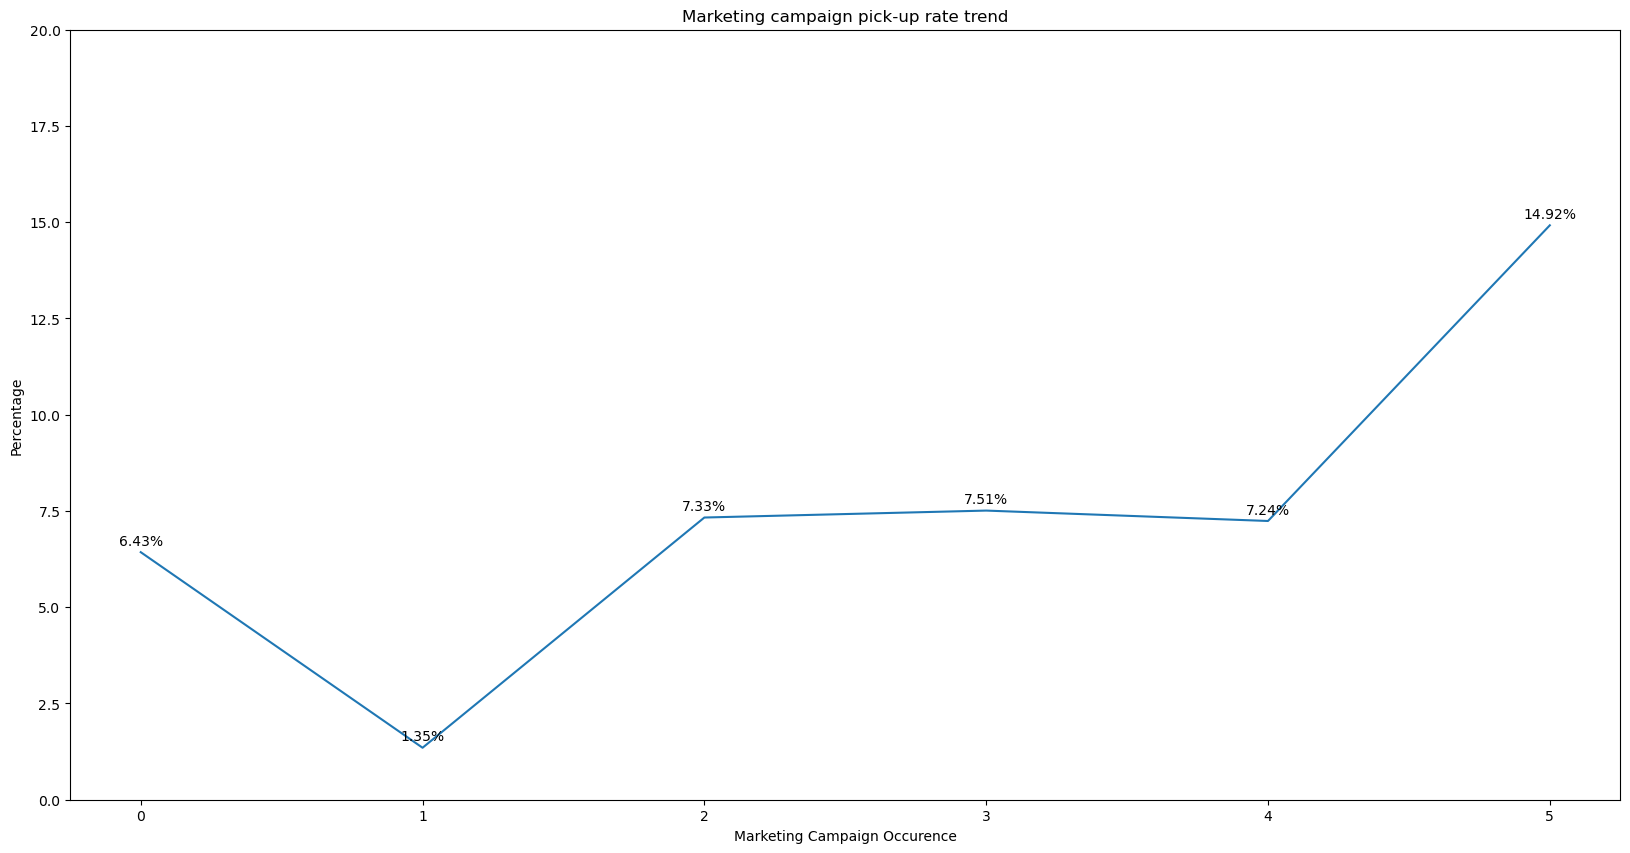

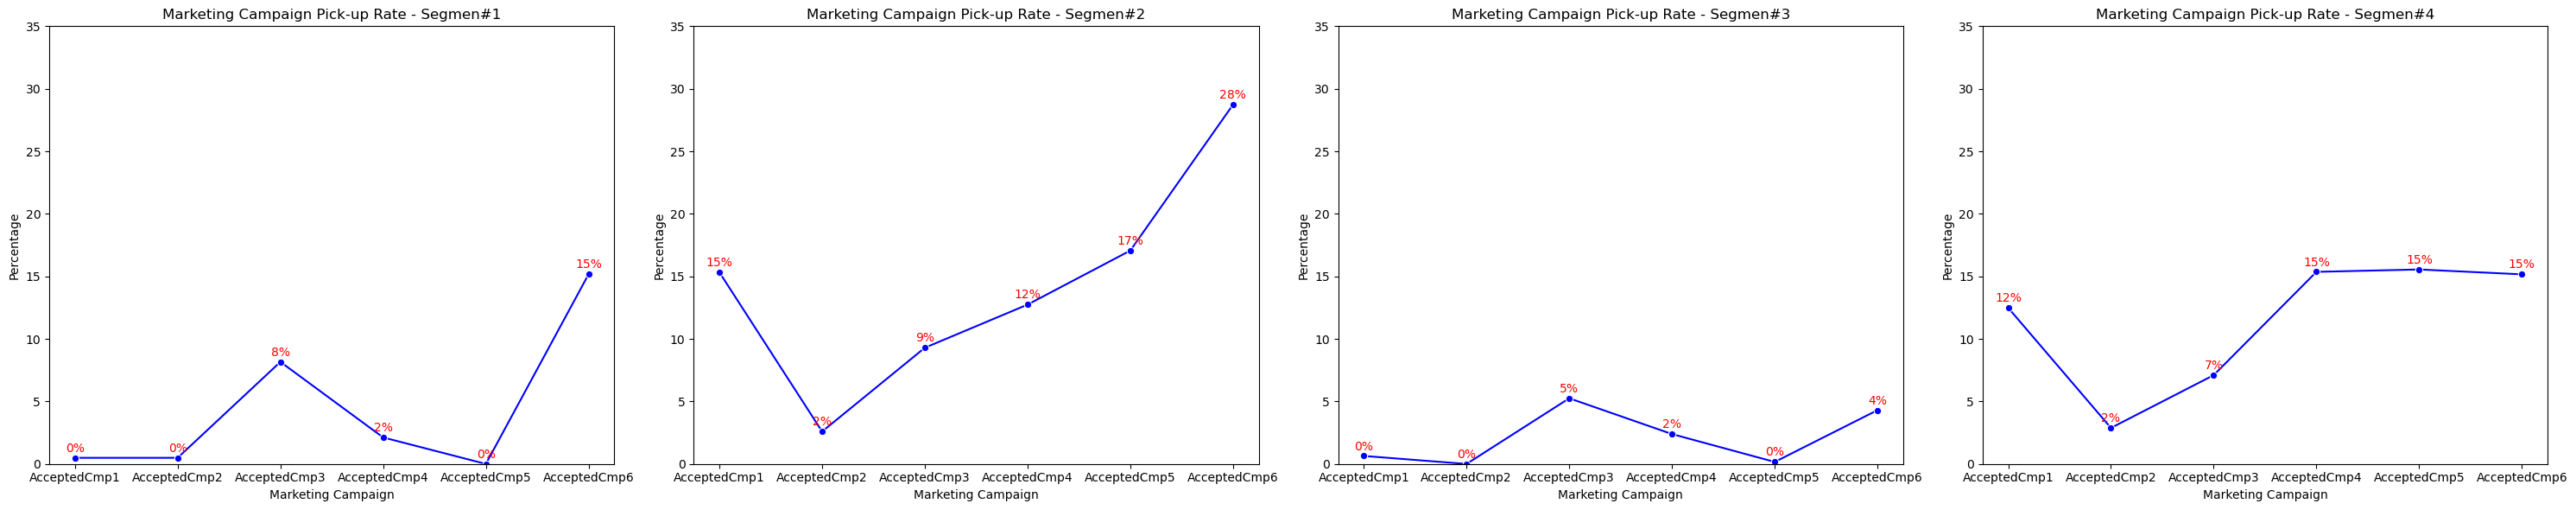

In [95]:
plt.figure(figsize=(20, 10))
sns.lineplot (data = trend_marketing_percentage ['Total'])
plt.xlabel('Marketing Campaign Occurence')
plt.ylabel('Percentage')
plt.title('Marketing campaign pick-up rate trend')
for x, y in zip(trend_marketing_percentage['Total'].index, trend_marketing_percentage['Total']):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.ylim( bottom = 0, top = 20)

# Graph trendline masing-masing segmen
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 6))

for i, segment in enumerate(trend_marketing_percentage.columns[2:]):
    sns.lineplot(data=trend_marketing_percentage, x='index', y=segment, marker='o', ax=axes[i], color='blue')
    
    trend_start = trend_marketing_percentage[segment].iloc[0]
    trend_end = trend_marketing_percentage[segment].iloc[-1]
    
    for index, row in trend_marketing_percentage.iterrows():
        axes[i].annotate(f'{int(row[segment])}%', (row['index'], row[segment]), textcoords="offset points", xytext=(0,5), ha='center', color='red')

    axes[i].set_title(f'Marketing Campaign Pick-up Rate - {segment}')
    axes[i].set_xlabel('Marketing Campaign')
    axes[i].set_ylabel('Percentage')

    axes[i].set_ylim(bottom=0, top=35)

plt.tight_layout()
plt.show()


Hasil analisa:
- Secara keseluruhan, rata-rata pick-up rate marketing campaign Supermarket X berada di kisaran 6 - 7%. 
    - Perbandingan antar periode campaign, campaign #2 menjadi periode campaign dengan performa paling buruk hanya dengan mendapat sekitar 1%. Sementara itu, Campaign terakhir yang dilakukan menunjukkan performa yang sangat baik, dimana campaign #6 berhasil mendapatkan pick-up rate sampai 15%. Supermarket X perlu melakukan analisa fundamental pada pelaksanaan campaign #2 dan #6 agar lebih memahami formula terbaik dan pembelajaran untuk melakukan marketing campaign berikutnya.
- Perbandingan antar segmen menunjukkan bahwa campaign yang dilakukan Supermarket X sangat efektif terhadap segmen potensial dan prioritas, yaitu segmen #2 dan 4, terbukti dari tingkat pick-up rate tiap campaign yang berada di atas rata-rata pick-up rate total. Selain itu, khusus untuk segmen #2 juga menunjukkan trend pick-up rate yang positif/meningkat, dimana artinya campaign yang dilakukan semakin efektif dalam menarik minat segmen ini.
- Sayangnya, campaign yang dilakukan terlihat belum cukup efektif untuk menarik minat pelanggan dari segmen #1 dan #3 dimana saat ini performanya cenderung stagnan dibawah rata-rata total. Hal ini perlu menjadi perhatian bagi Supermarket X kedepan untuk melakukan evaluasi fundamental secara lebih spesifik untuk mencari penyebab campaign-nya belum berhasil di segmen ini.

# **FINAL CONCLUSION AND RECOMMENDATION**

**Segmen pelanggan Supermarket X potensial beserta deskripsi profil & karakteristik-nya**

- Berdasarkan hasil clustering dan segmentasi pelanggan Supermarket X berdasarkan model analisa RFM (Recency, Frequency, Monetary), ada 4 segmen utama pelanggan yang teridentifikasi. Dari 4 segmen tersebut, ada 2 segmen yang memiliki potensial atas ketiga faktor tersebut. Selain itu, berdasarkan analisa trend pertumbuhan juga memperlihatkan bahwa kedua segmen tersebut mengalami trend yang negatif. Oleh karena itu, hasil analisa menyampaikan rekomendasi agar Supermarket X perlu menjadikan kedua segmen ini sebagai segmen prioritas untuk menjadi target market utama Supermarket ke depan.
- Agar mempermudah Supermarket dalam mengenali siapa target market utamanya, analisa ini juga memberikan profil dan karakteristik dari kedua segmen #2 dan #4 tersebut. Melalui deskripsi ini, Supermarket X dapat melakukan serangkaian usaha yang menyasar pada calon pelanggan yang memiliki kesamaan karakterisik dan menjadi langkah menambah pelanggan baru ke Supermarket. Karakteristik dan profilnya adalah sebagai berikut:
    - Pelanggan dewasa yang lebih tua
    - Memiliki tingkat pendidikan Graduation atau lebih tinggi
    - Pelanggan yang sudah menikah atau memiliki pasangan
    - Bukan orangtua. Apabila merupakan orangtua, umumnya hanya memiliki 1 anak 
    - Memiliki tingkat pemasukan tahunan yang tinggi, rata-rata 60001 - 80000 dollar per tahun
- Khusus untuk Segmen #4, Supermarket X perlu melakukan tindakan secara lebih cepat dikarenakan segmen ini terindikasi cenderung sudah lama tidak berbelanja di Supermarket X (memiliki tingkat Recency yang rendah). Langkah cepat perlu dilakukan agar pelanggan di segmen ini tidak hilang dari Supermarket X.

**Strategi untuk mempertahankan dan memperbesar pelanggan segmen potensial**



Setelah mengetahui pelanggan seperti apa yang perlu difokuskan, langkah selanjutnya adalah menyiapkan strategi yang efektif dalam menarik orang-orang tersebut untuk berbelanja ke Supermarket X. Berikut adalah sejumlah temuan dan saran yang dapat dipertimbangkan Supermarket X.
- Berdasarkan analisa produk pembelanjaan, pelanggan potensial Supermarket X terindikasi banyak berbelanja untuk tipe produk Wine dan Meat. Supermarket X perlu memaksimalkan potensi pemasukan dengan memfokuskan katalog dan stok-nya untuk dua jenis produk ini. Perbanyak varian barang untuk kedua tipe produk ini menjadi salah satu langkahnya. Selain memperbesar kemungkinan pelanggan dapat menemukan barang yang mereka cari, langkah ini dapat semakin membentuk citra Supermarket X sebagai supermarket dengan speliasisasi di kedua produk tersebut.
- Berdasarkan analisa channel pembelian, pelanggan potensial Supermarket X masih cenderung berbelanja di Toko fisik/offline, diikuti oleh Website di tempat kedua. Oleh karena itu, Supermarket X perlu tetap memfokuskan usahanya dalam bentuk toko fisik/offline. Salah satu langkah yang dapat dipertimbangkan adalah mencari potensi untuk membuka toko cabang di lokasi lain yang potensial di masa depan.
- Berdasarkan analisa performa marketing menunjukkan bahwa segment potensial Supermarket X terindikasi cenderung tidak mempermasalahkan ketersediaan promo. Ini menguntungkan bagi Supermarket X karena tanpa adanya promo pun segmen ini bisa tetap tertarik untuk berbelanja. Hal ini semakin menguatkan urgensi agar Supermarket X memfokuskan usahanya di dua poin sebelumnya.
    - Hanya saja, apabila Supermarket X tetap ingin melakukan usaha melalui promosi/marketing campaign, Supermarket X dapat menggunakan formula yang serupa dengan campaign-campaign sejauh ini. Hal ini dikarenakan campaign yang telah dilakukan terbukti efektif dalam menarik minat segmen ini.